In [1]:
import tensorflow as tf
import numpy as np
import os
import librosa


c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import os
import librosa

audio_files_dir = r'archive\16000_pcm_speeches'
audio_data = []
sr_audios = []
for root, dirs, files in os.walk(audio_files_dir):
  for file in files:
    if file.endswith(".wav"):
      file_path = os.path.join(root, file)
      data, sr = librosa.load(file_path, sr=None)
      sr_audios.append(sr)
      audio_data.append(data)


KeyboardInterrupt: 

In [ ]:
print(audio_data[1])

[ 0.00396729 -0.00119019 -0.00973511 ...  0.20730591  0.18551636
  0.1104126 ]


[7501, 1, 1, 1, 1, 1, 1]


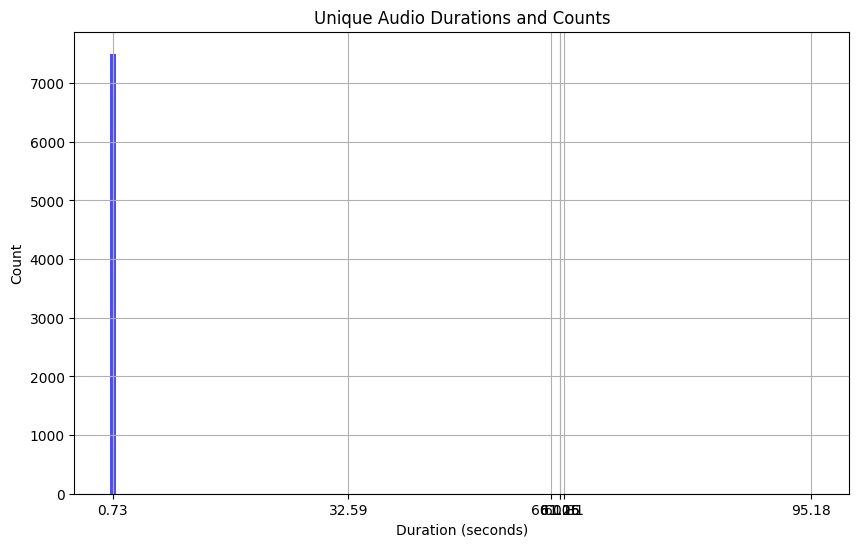

[ 0.72562358 32.58566893 60.         61.1555102  61.25387755 61.80571429
 95.18312925]


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Calculate the duration of each audio clip in seconds
audio_durations = [len(data) / sr for data in audio_data]

duration_counts = Counter(audio_durations)

unique_durations = list(duration_counts.keys())
counts = list(duration_counts.values())

print(counts)
# Create a bar chart to visualize unique audio durations and their counts
plt.figure(figsize=(10, 6))
plt.bar(unique_durations, counts, color='blue', alpha=0.7)
plt.title('Unique Audio Durations and Counts')
plt.xticks(np.unique(audio_durations))
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.grid(True)
plt.show()
print((np.unique(audio_durations)))

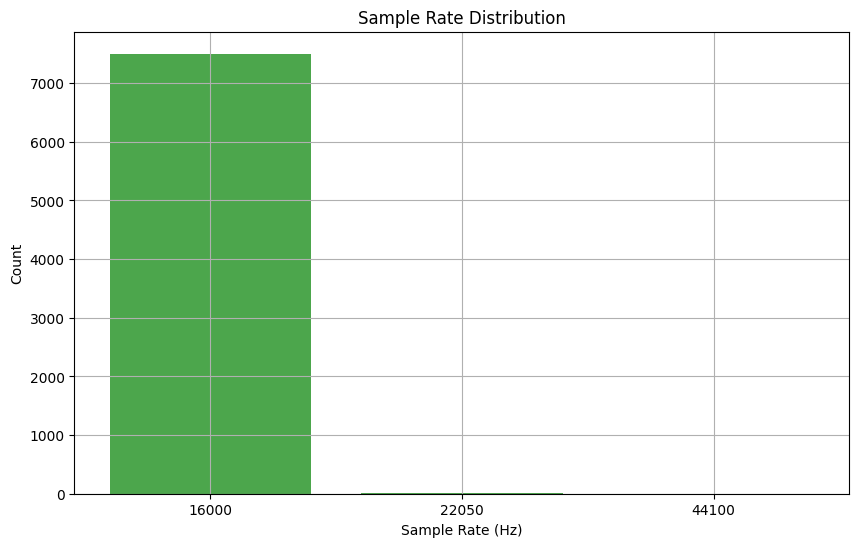

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Extract sample rates from the audio data
sample_rates = sr_audios

# Count the occurrences of each sample rate
sample_rate_counts = Counter(sample_rates)

# Extract unique sample rates and their counts
unique_sample_rates = list(sample_rate_counts.keys())

counts = list(sample_rate_counts.values())
plt.figure(figsize=(10, 6))
plt.bar(range(len(unique_sample_rates)), counts, color='green', alpha=0.7)
plt.title('Sample Rate Distribution')
plt.xlabel('Sample Rate (Hz)')
plt.ylabel('Count')
plt.xticks(range(len(unique_sample_rates)), unique_sample_rates)  # Set custom X-axis labels
plt.grid(True)
plt.show()



In [ ]:
print(unique_sample_rates)
print(counts)

[16000, 22050, 44100]
[7501, 5, 1]


In [ ]:
invalid_sample_rate_paths = []


In [ ]:
# Compare the unique_sample_rates list with the expected sample rate (16000 Hz)
for i, rate in enumerate(unique_sample_rates):
    if rate != 16000:
        invalid_sample_rate_paths.extend([file for file, s in zip(files, sr_audios) if s == rate])

# Display the audio paths where the sample rate is not 16000
if len(invalid_sample_rate_paths) > 0:
    print("Audio paths where the sample rate is not 16000:")
    for path in invalid_sample_rate_paths:
        print(os.path.join(audio_files_dir, path))
else:
    print("No audio paths found with a sample rate other than 16000.")


No audio paths found with a sample rate other than 16000.


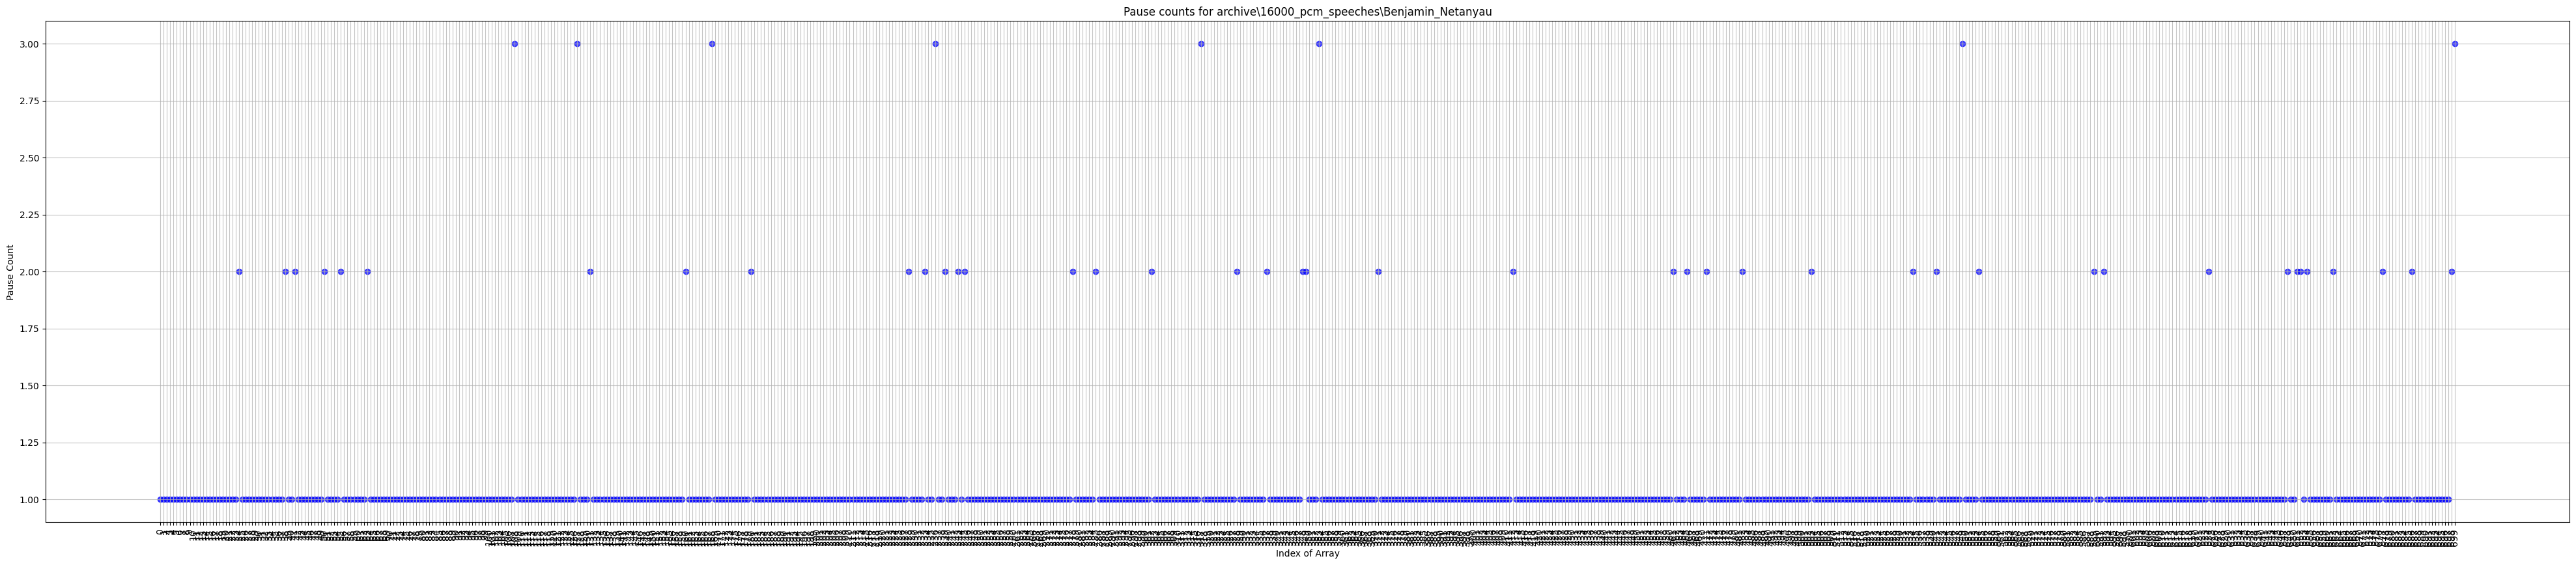

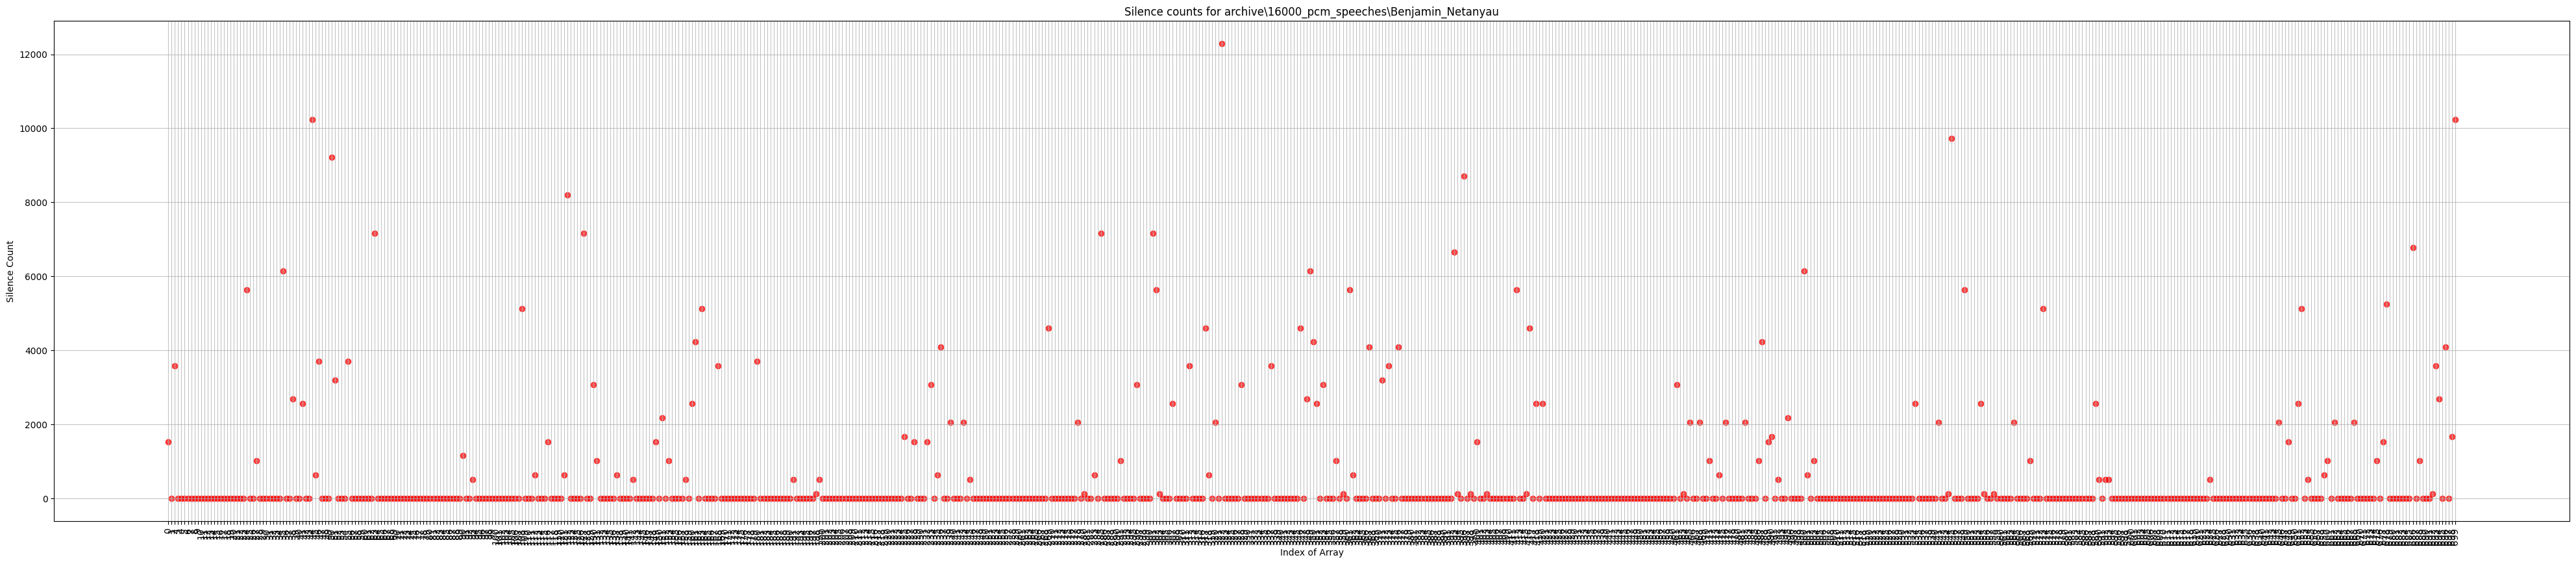

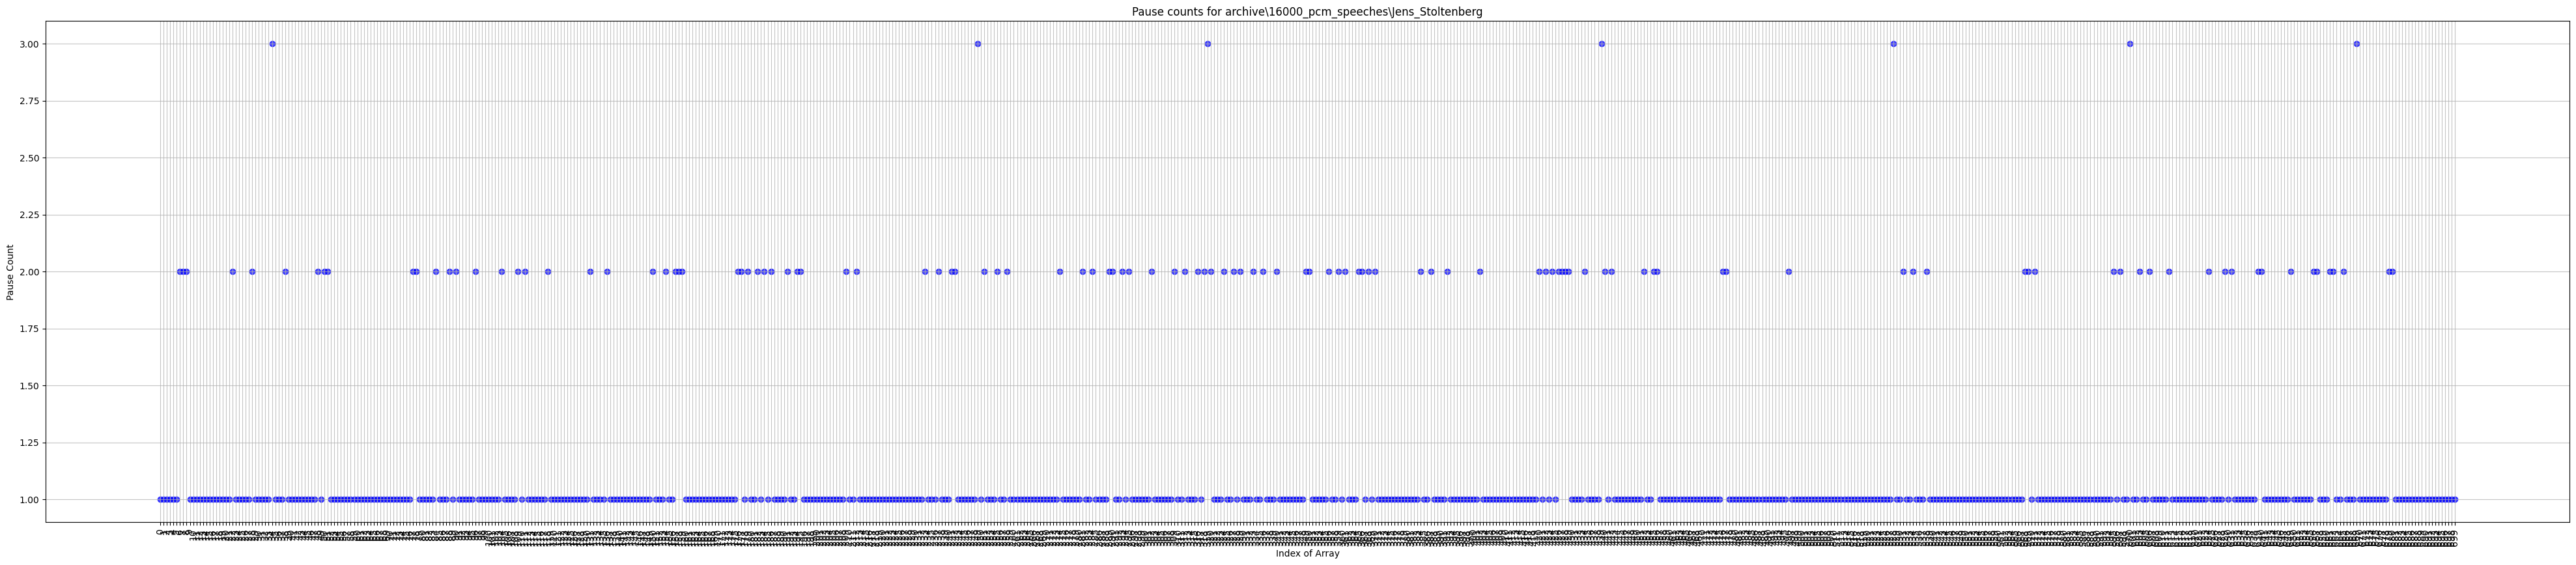

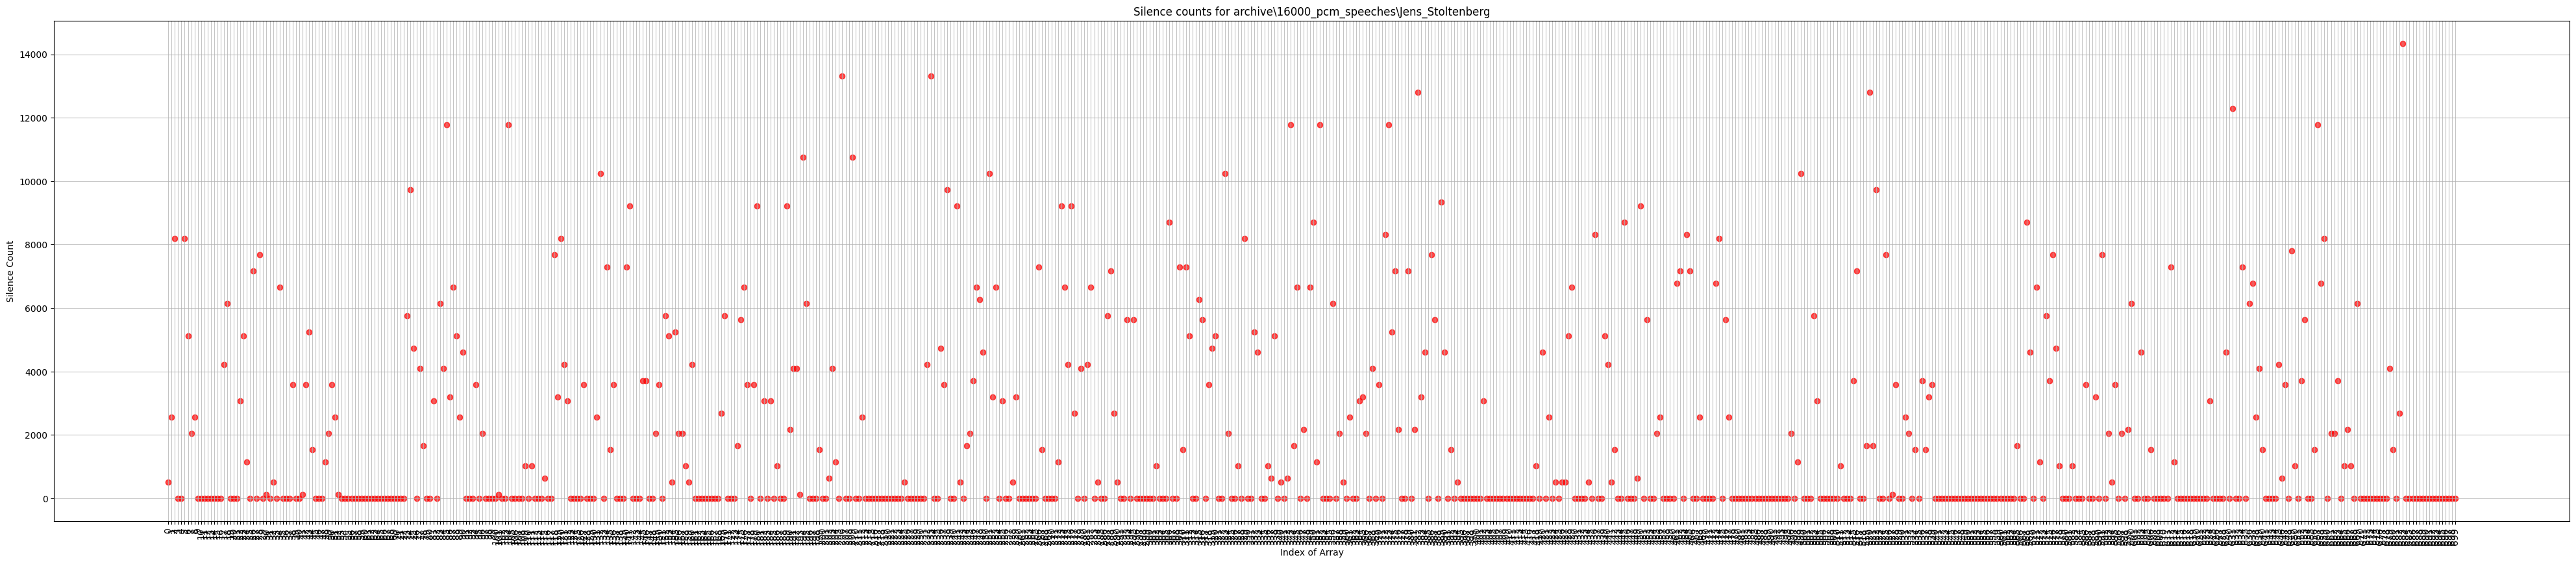

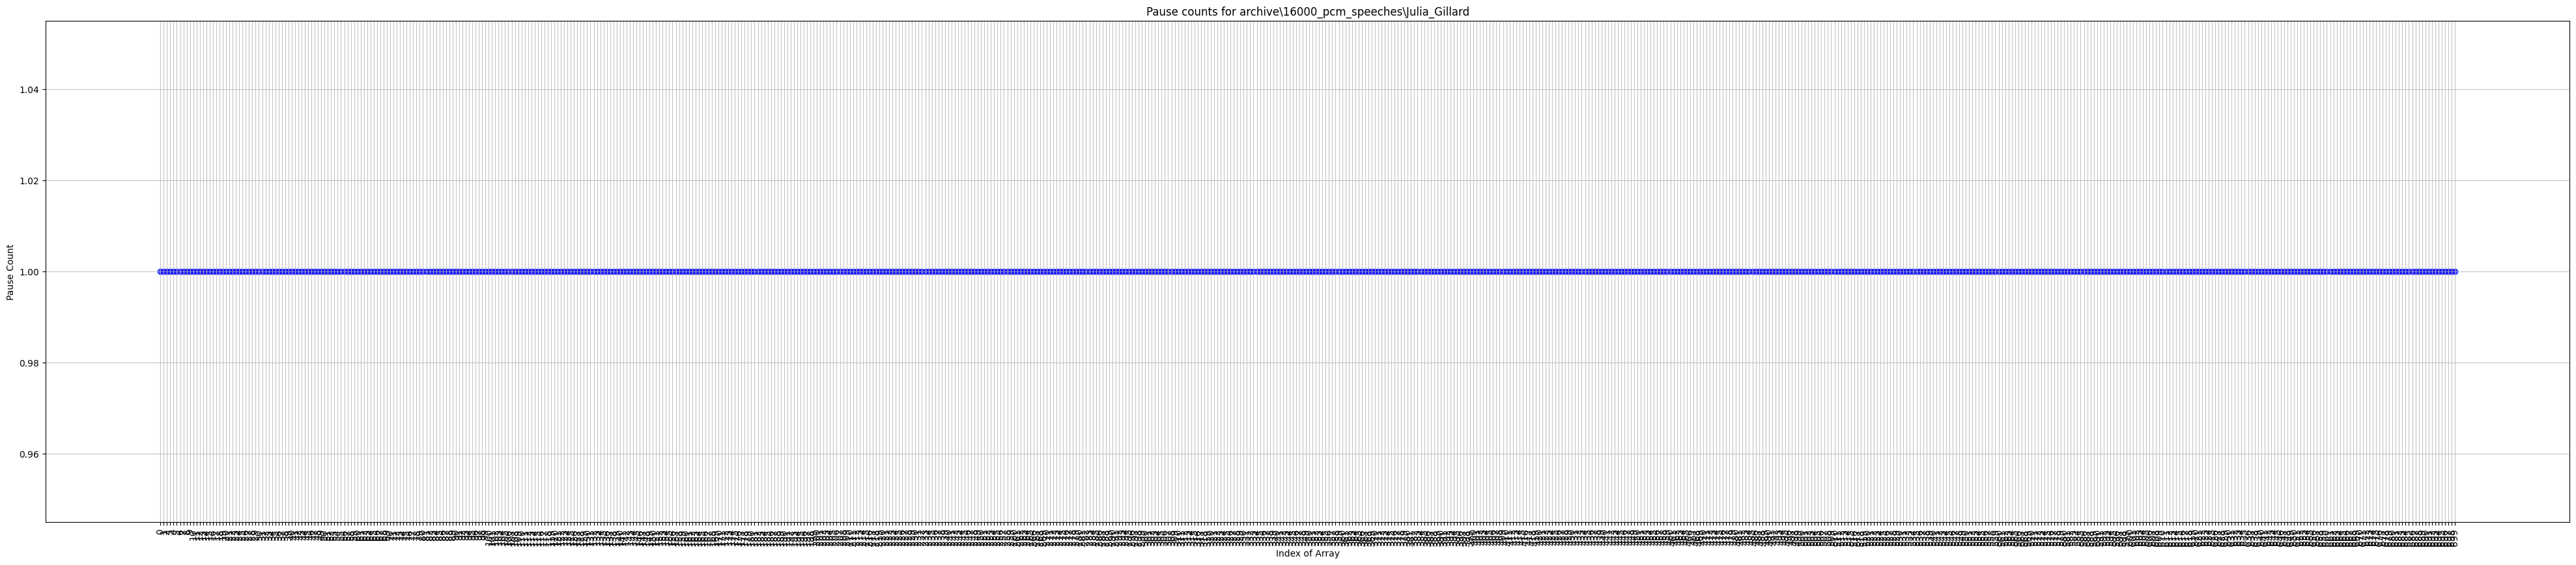

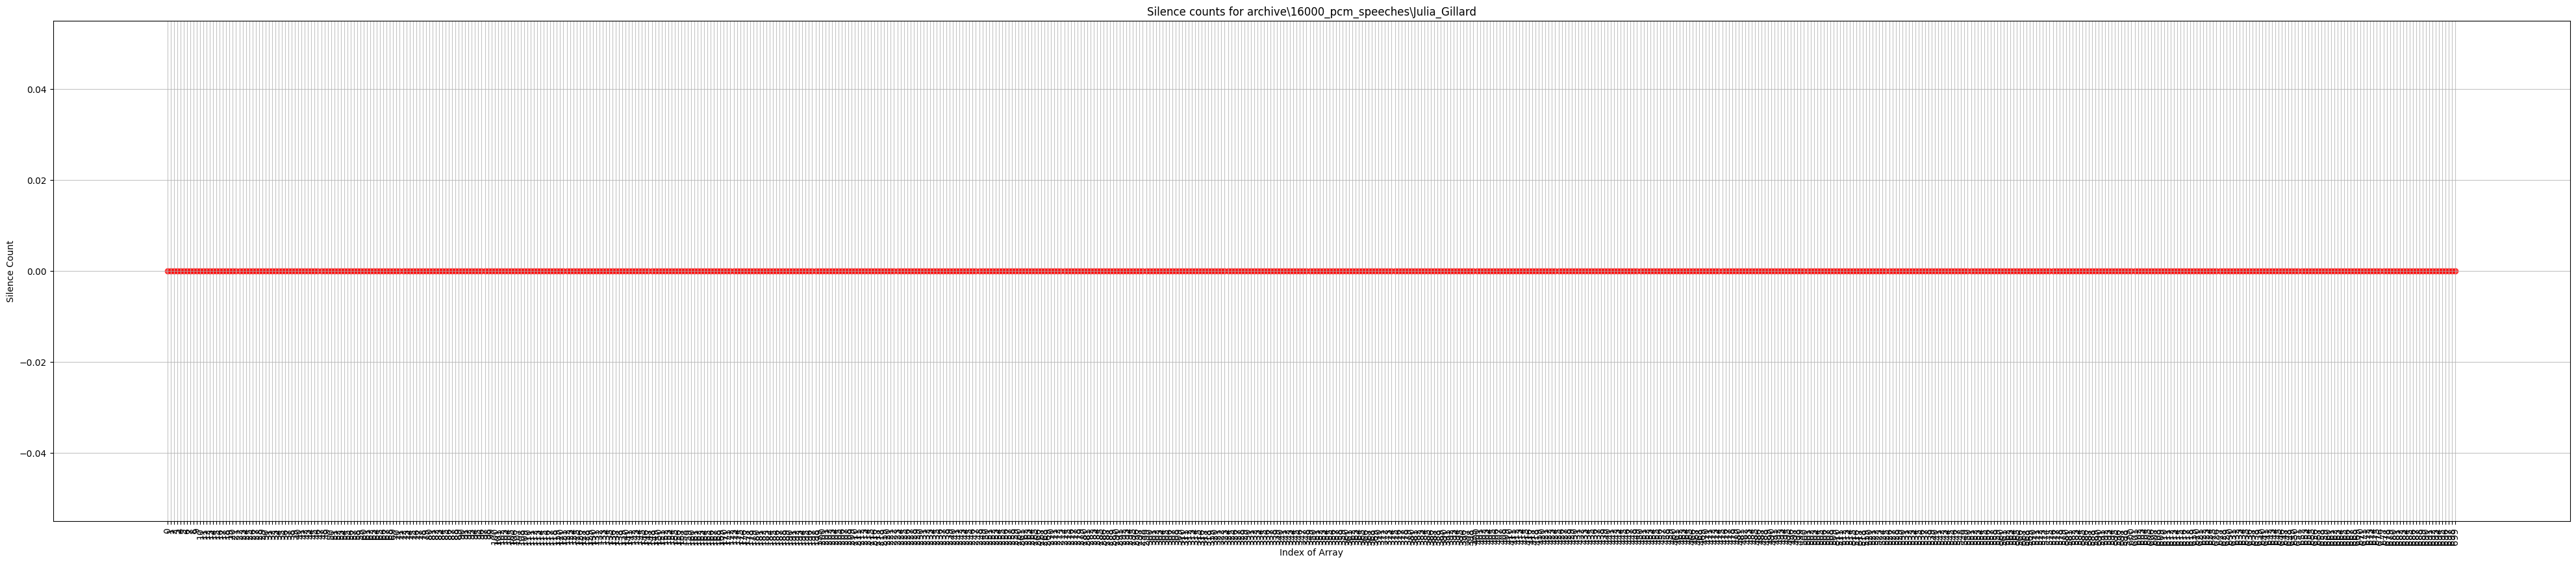

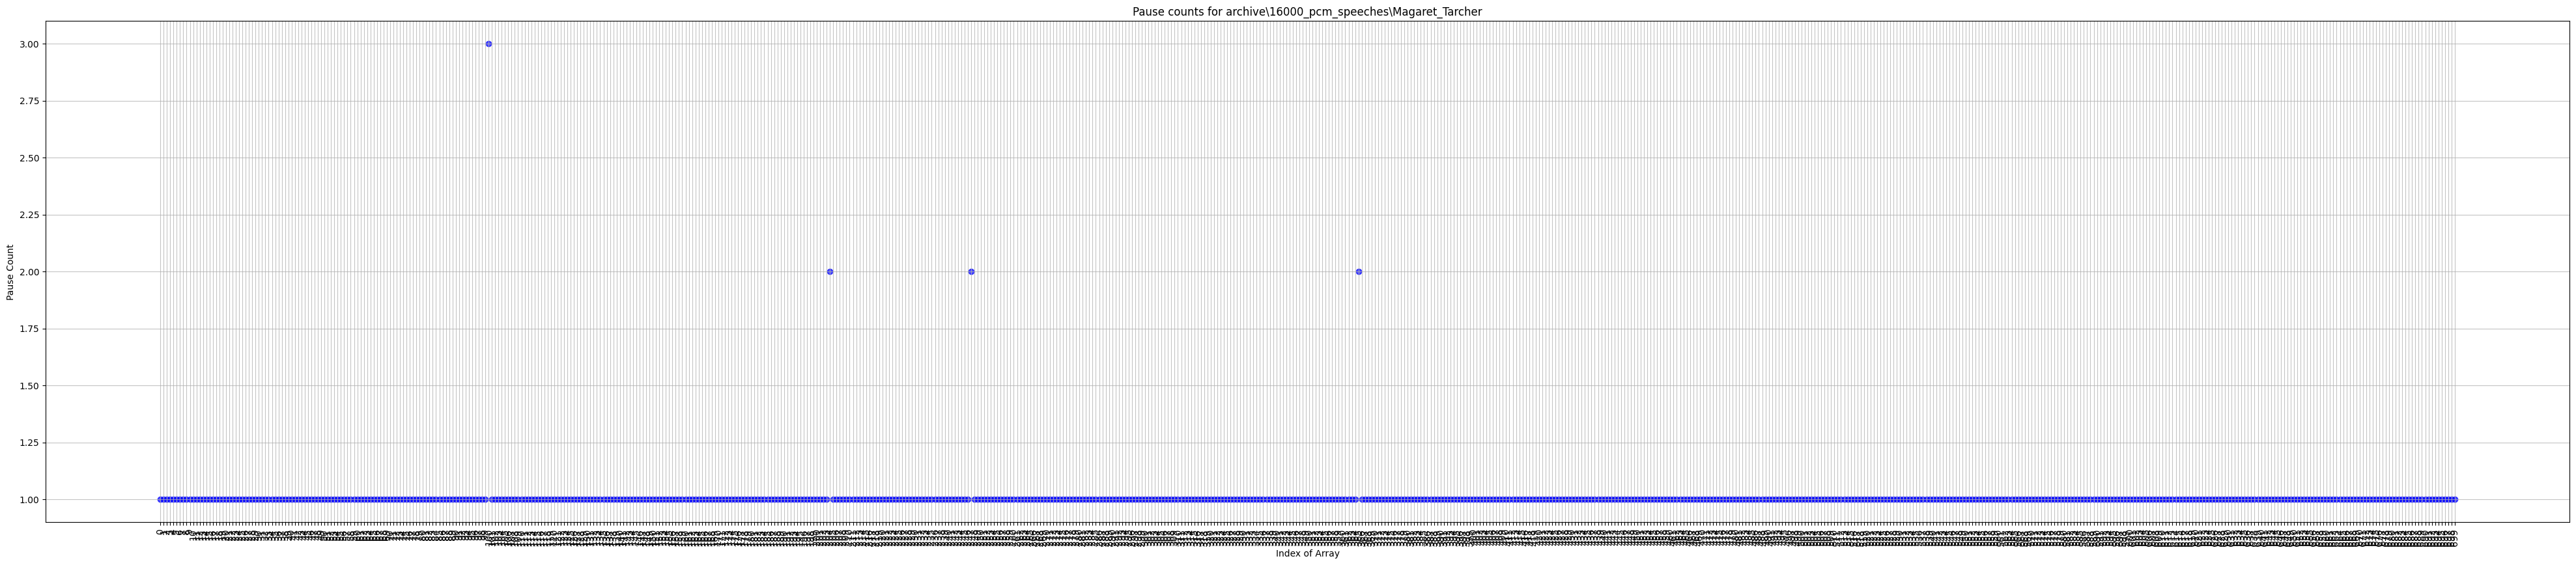

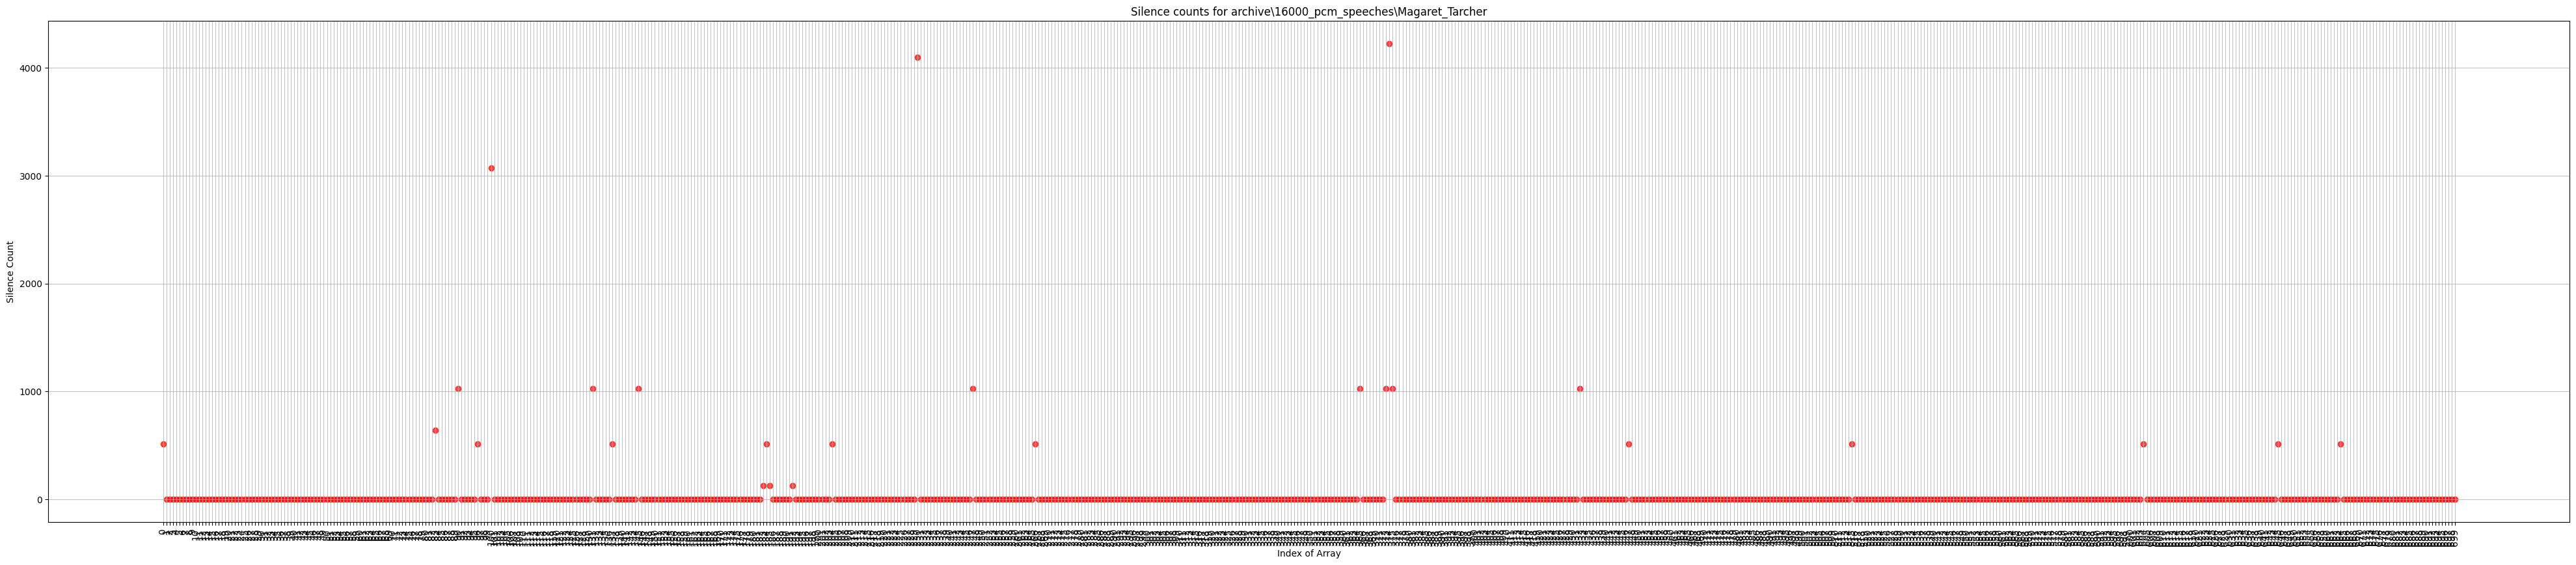

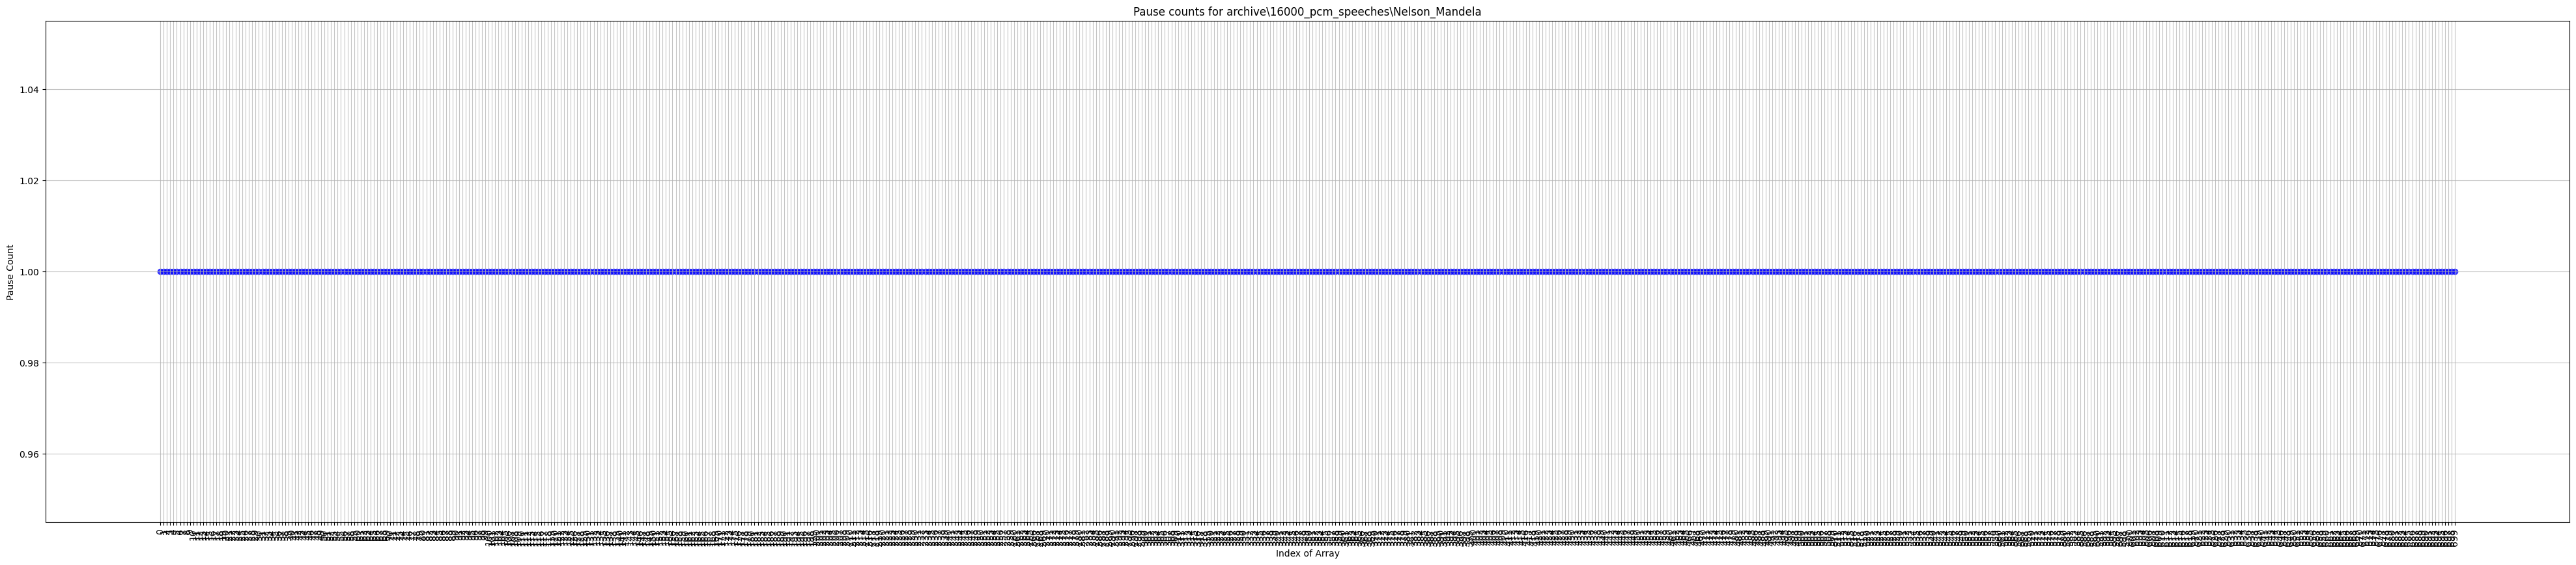

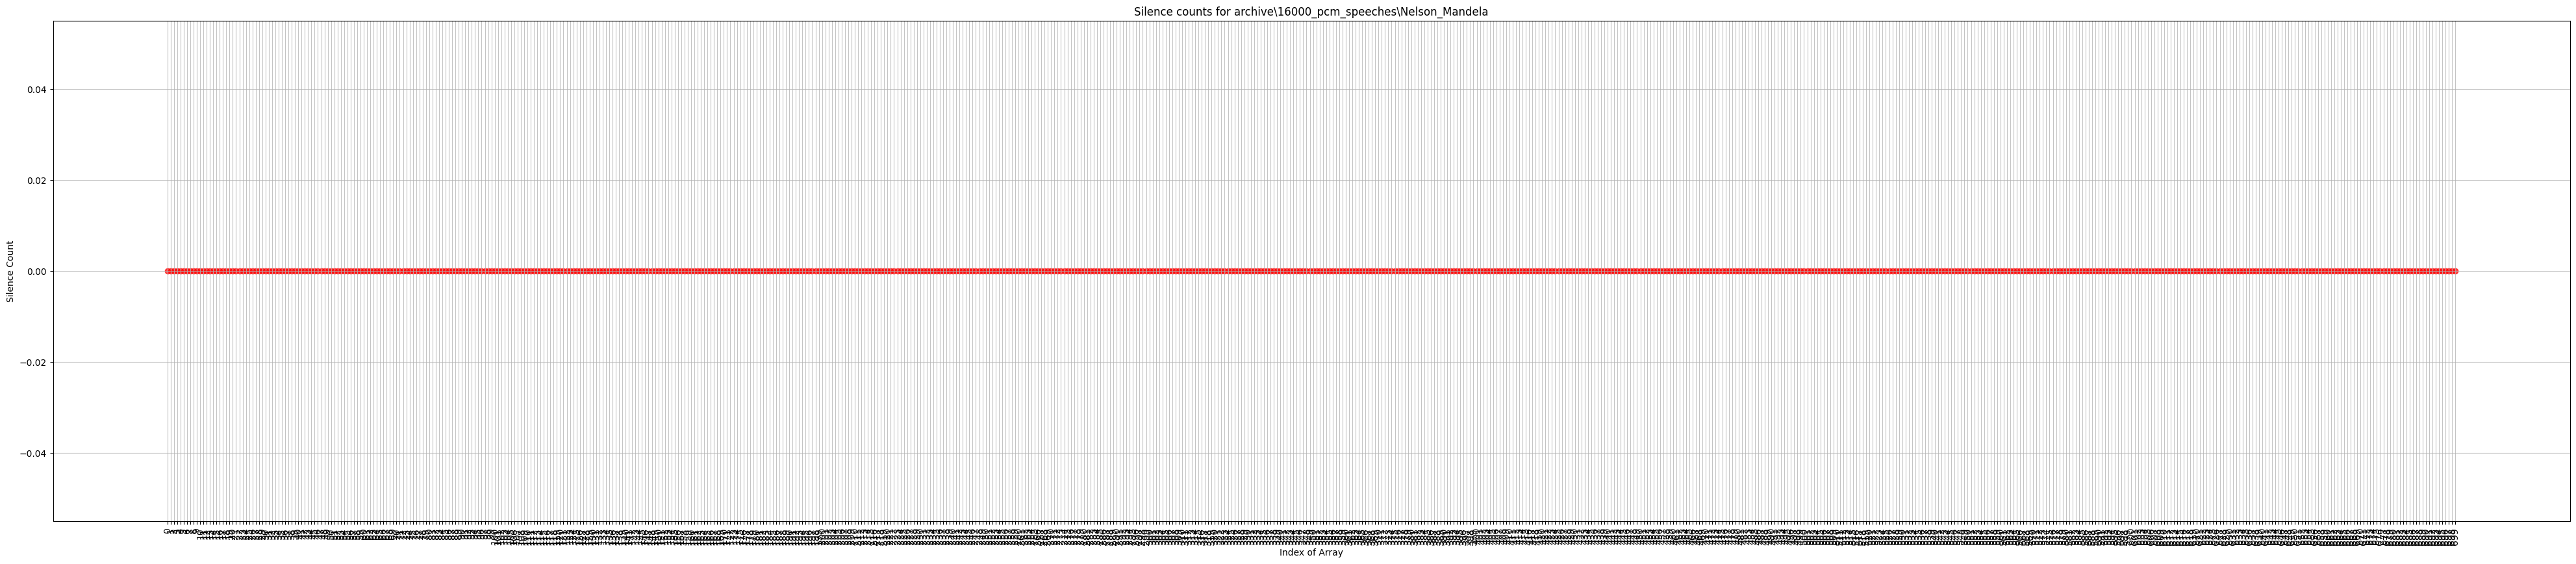

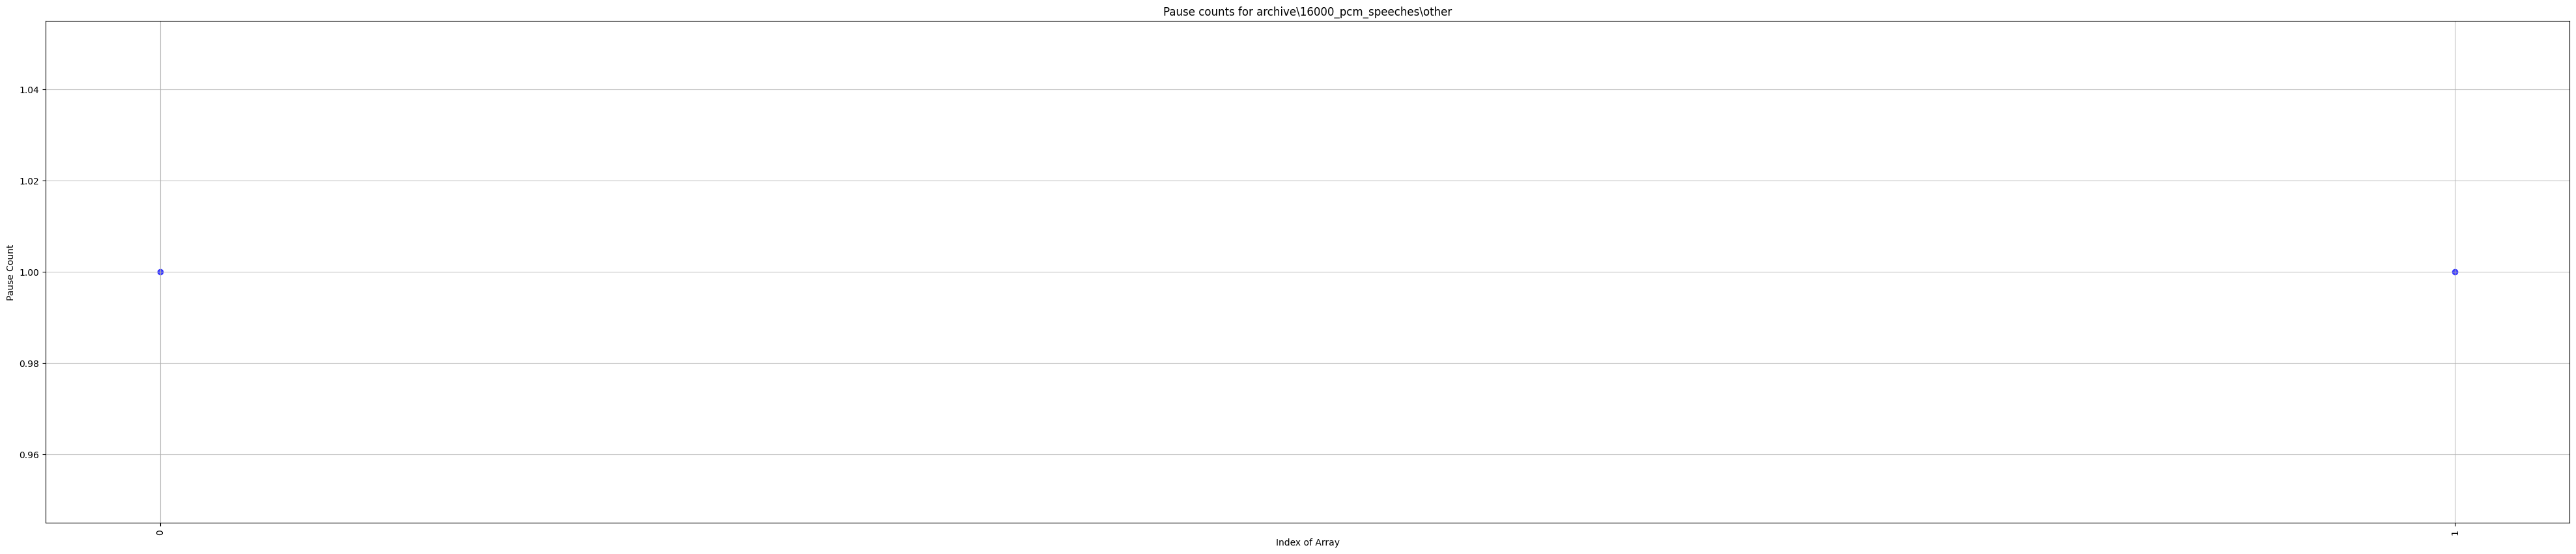

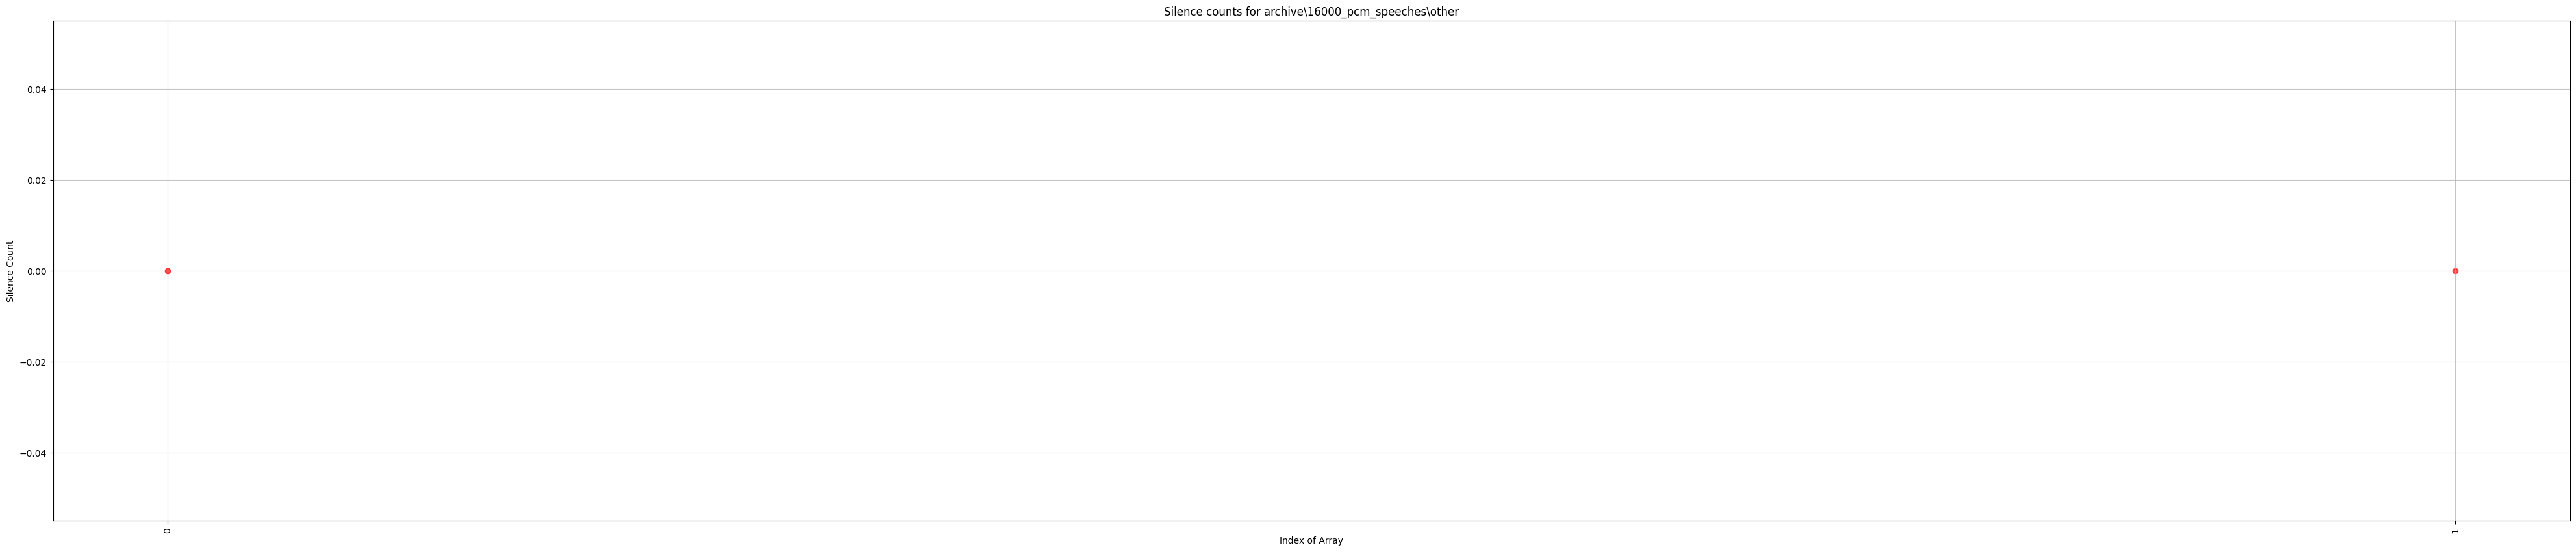

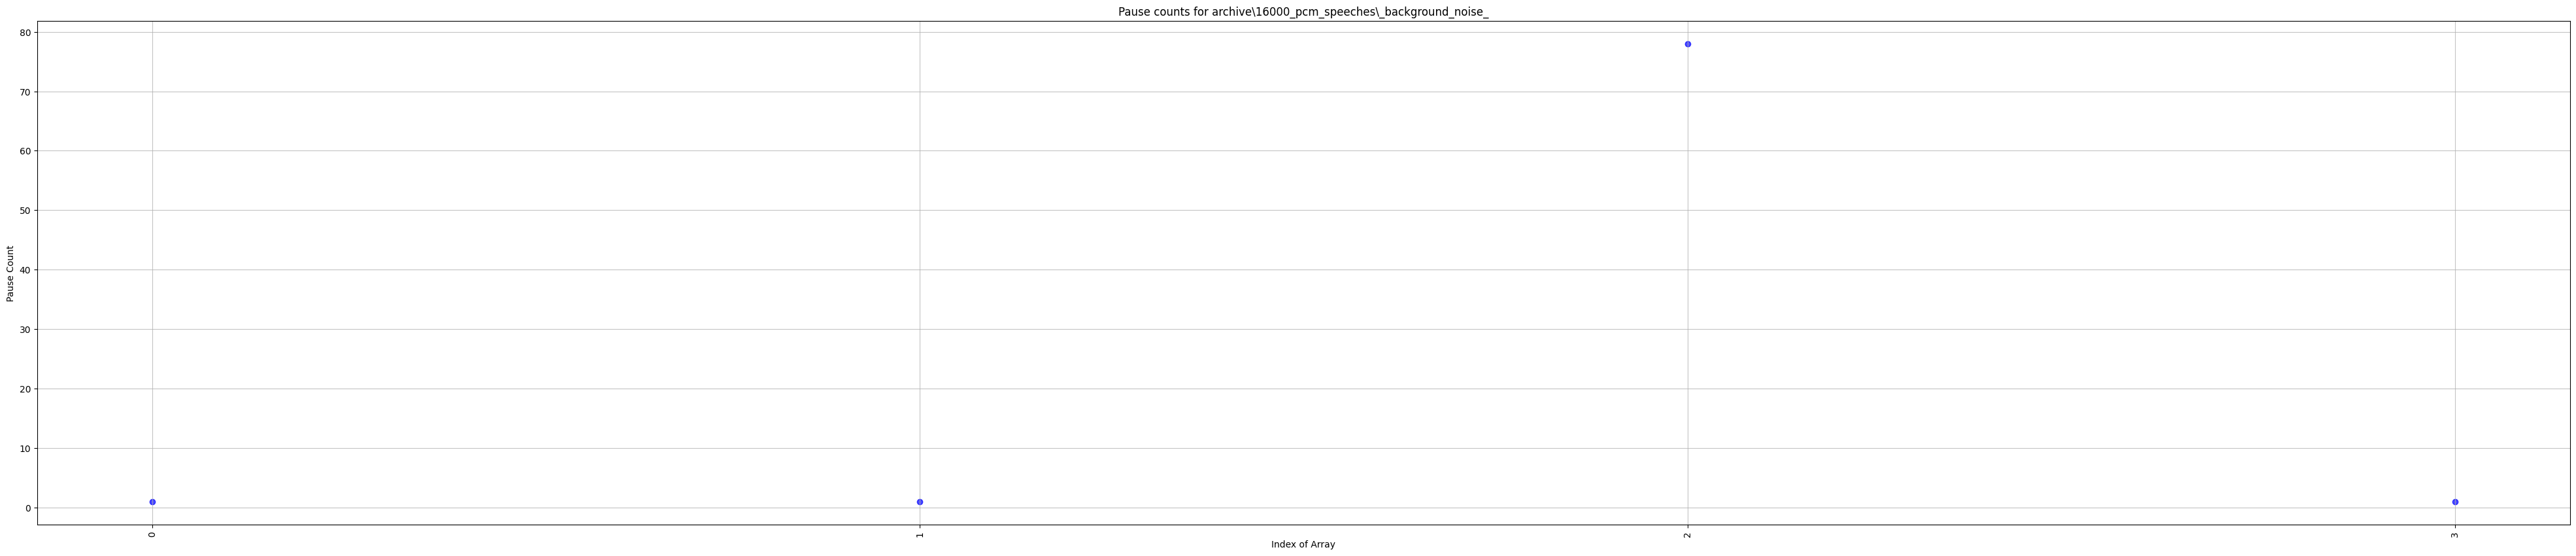

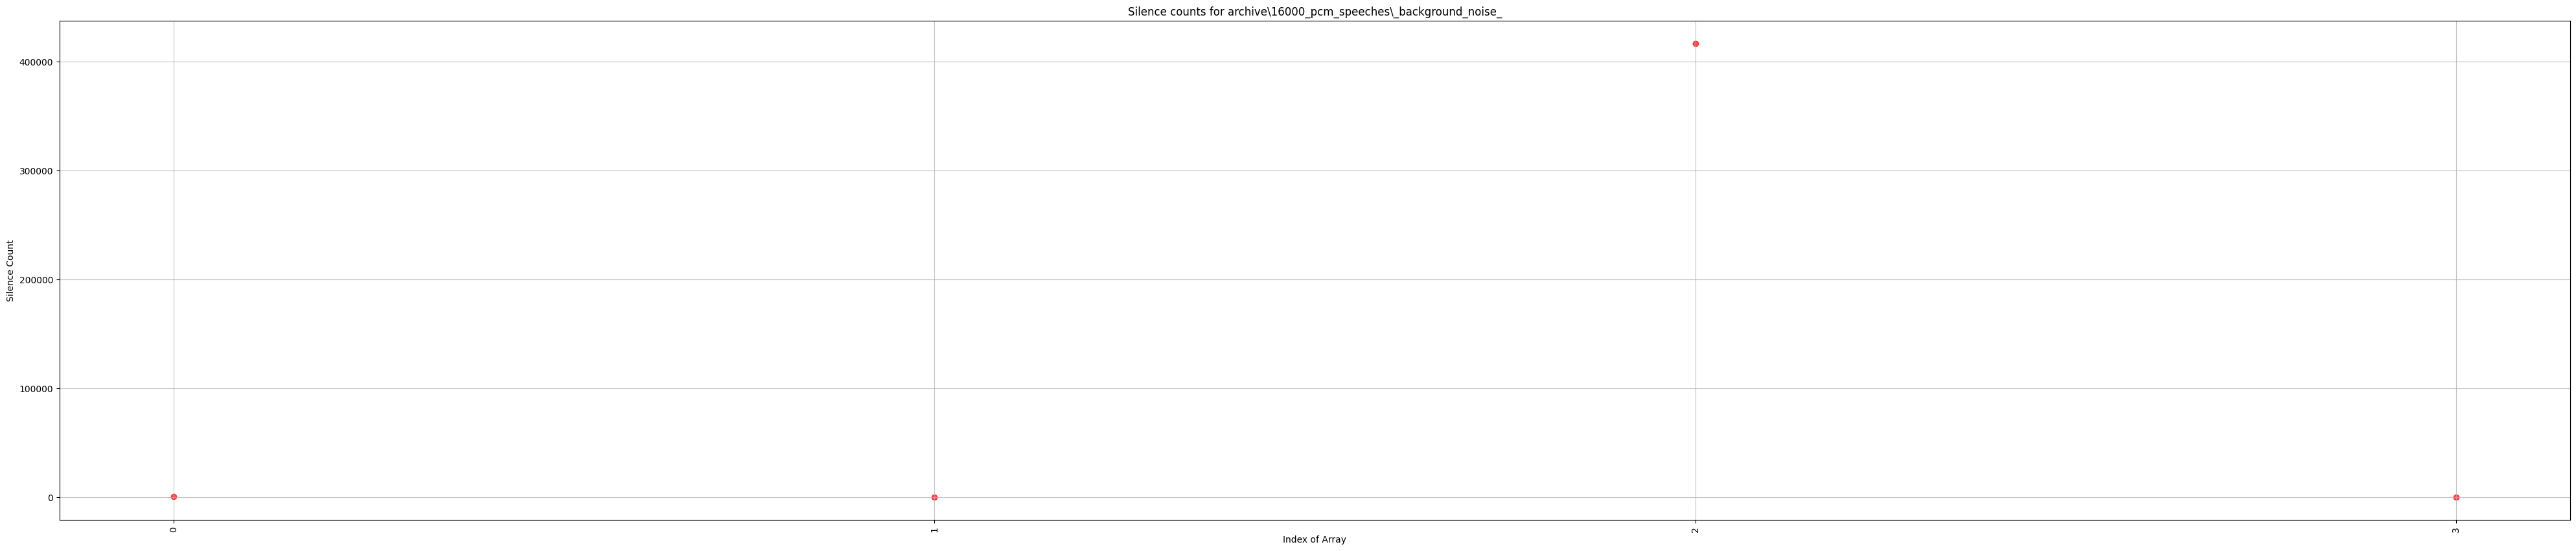

In [ ]:
def plot_pause_and_silence_for_folder(folder_path):
    for root, dirs, files in os.walk(folder_path):
        pause_counts = []
        silence_counts = []
        file_indices = []

        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                data, sr = librosa.load(file_path, sr=None)

                intervals = librosa.effects.split(data, top_db=30)
                pause_counts.append(len(intervals))
                silence_counts.append(len(data) - sum([y - x for x, y in intervals]))

        pause_counts = pause_counts[:700]
        silence_counts = silence_counts[:700]

        if pause_counts:
            plt.figure(figsize=(50, 10))
            plt.scatter(range(len(pause_counts)), pause_counts, color='b', alpha=0.7)  # Using scatter plot
            plt.title(f'Pause counts for {root}')
            plt.xlabel('Index of Array')
            plt.ylabel('Pause Count')
            plt.xticks(range(len(pause_counts)), range(len(pause_counts)), rotation=90)
            plt.grid(axis='both', alpha=0.75)
            plt.show()

        if silence_counts:
            plt.figure(figsize=(50, 10))
            plt.scatter(range(len(silence_counts)), silence_counts, color='r', alpha=0.7)  # Using scatter plot
            plt.title(f'Silence counts for {root}')
            plt.xlabel('Index of Array')
            plt.ylabel('Silence Count')
            plt.xticks(range(len(silence_counts)), range(len(silence_counts)), rotation=90)
            plt.grid(axis='both', alpha=0.75)
            plt.show()

for entry in os.scandir(audio_files_dir):
    if entry.is_dir():
        plot_pause_and_silence_for_folder(entry.path)


In [ ]:
# for root, dirs, files in os.walk(audio_files_dir):
#   for file in files : 
#     file_path = os.path.join(root, file)
#     print(file_path)

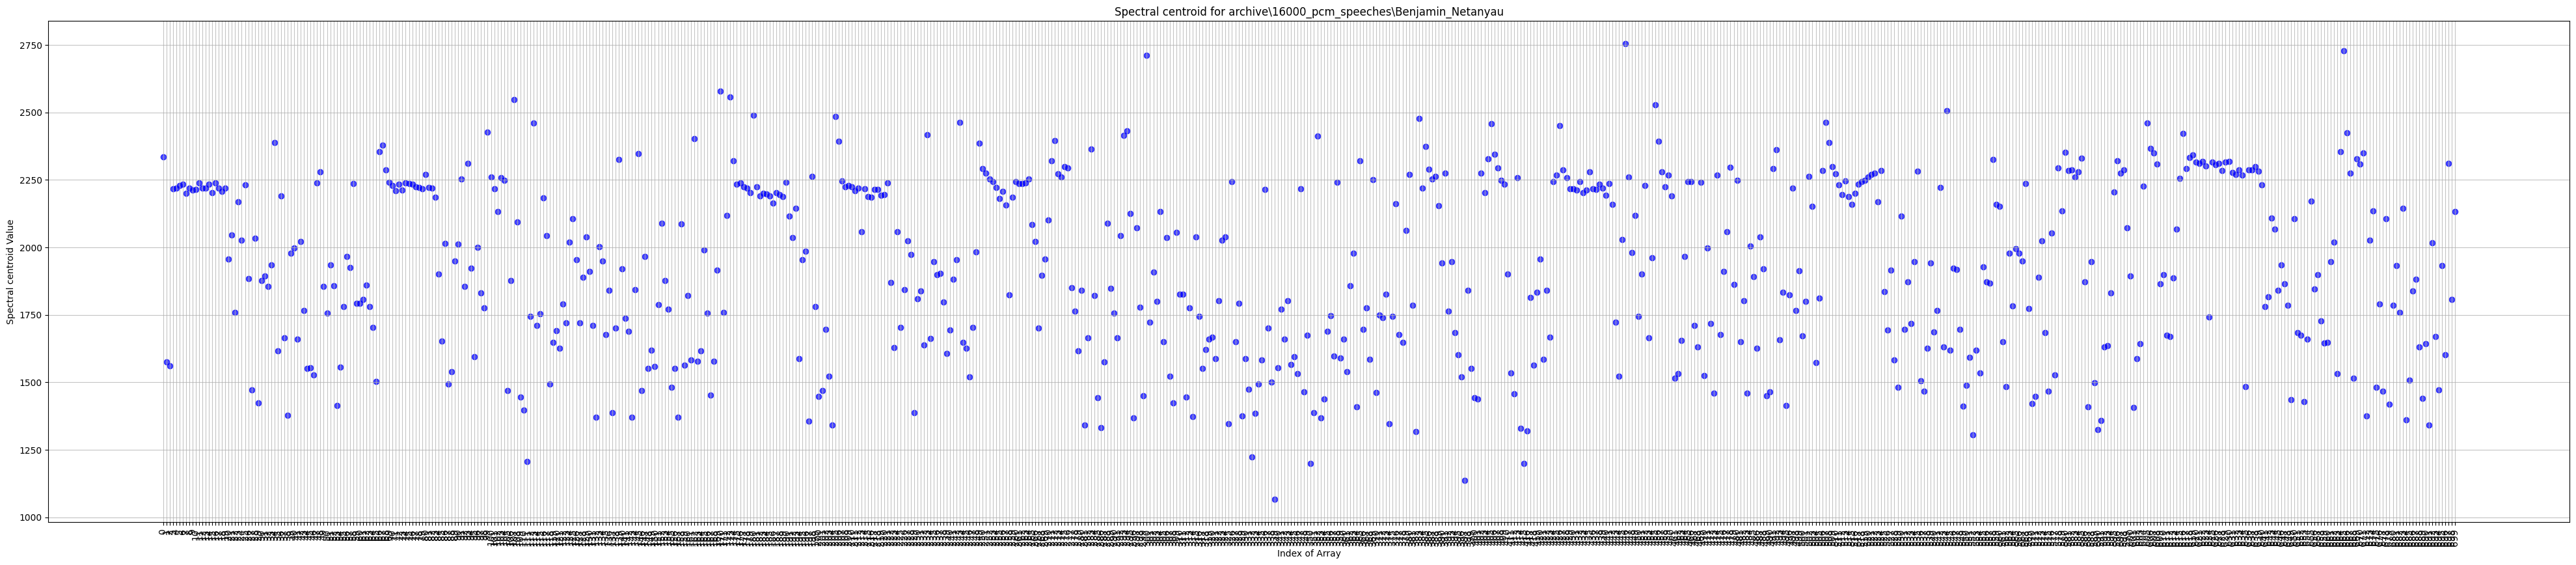

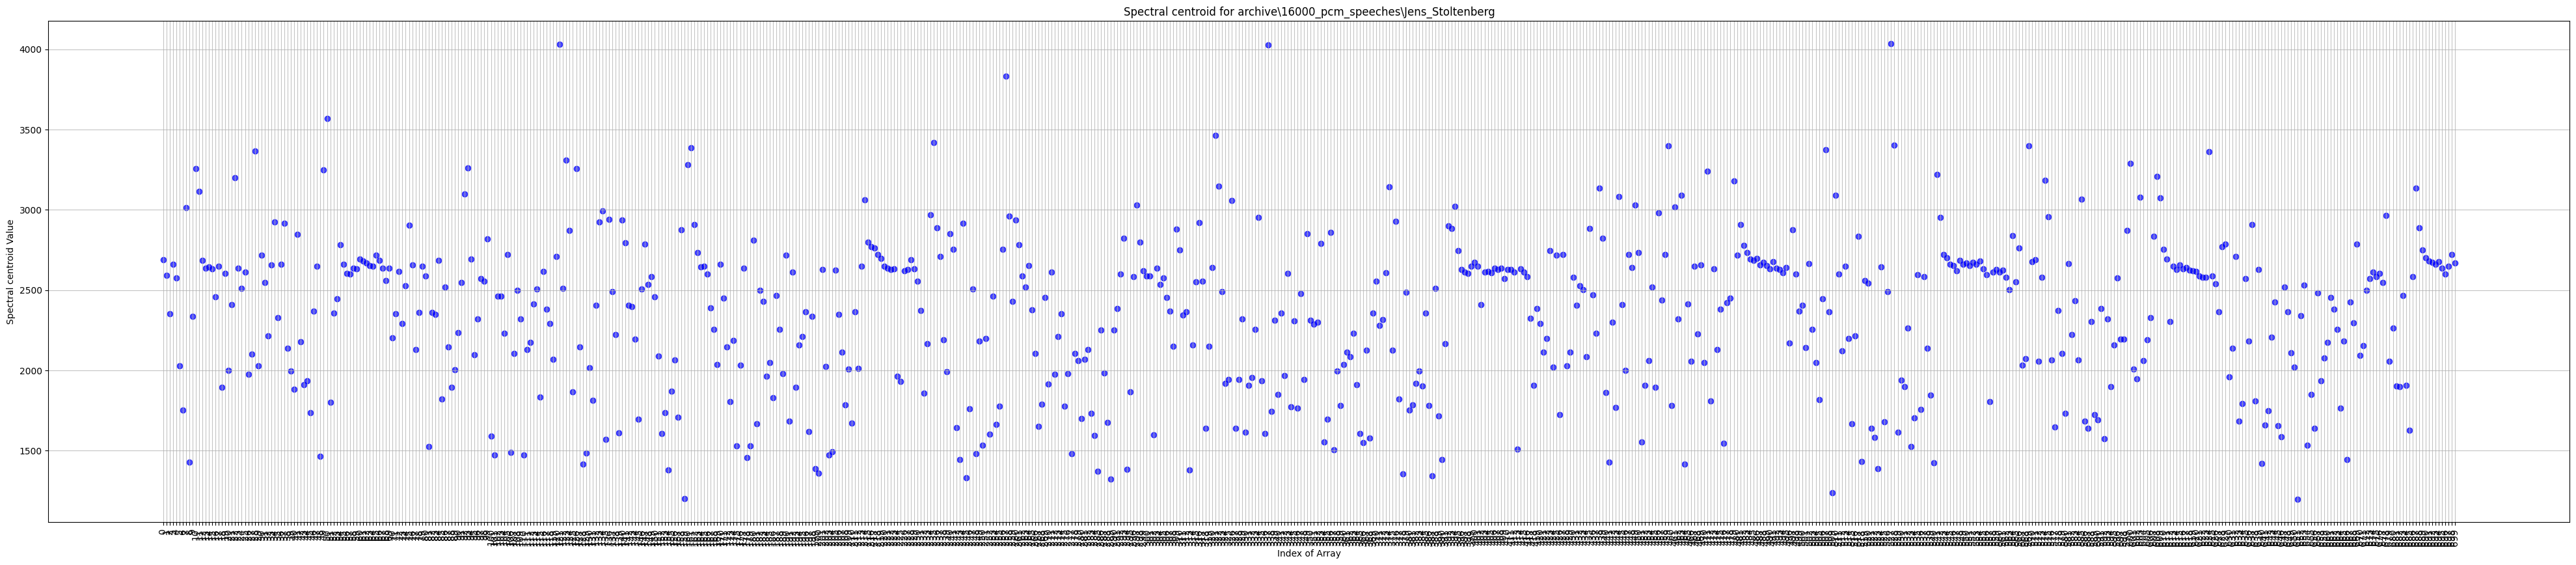

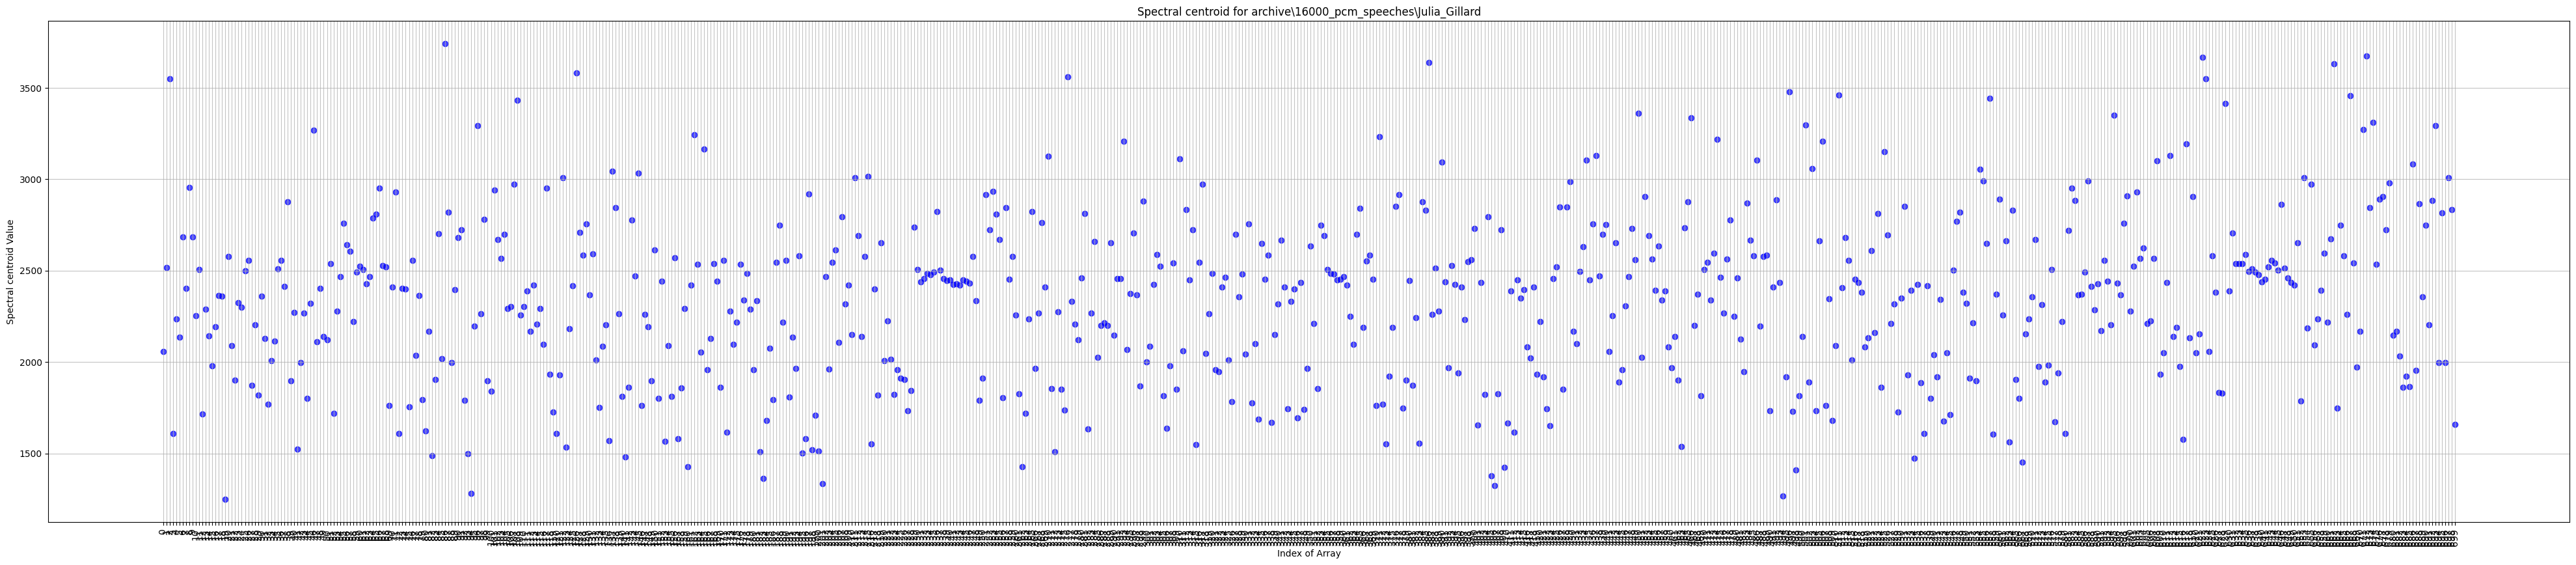

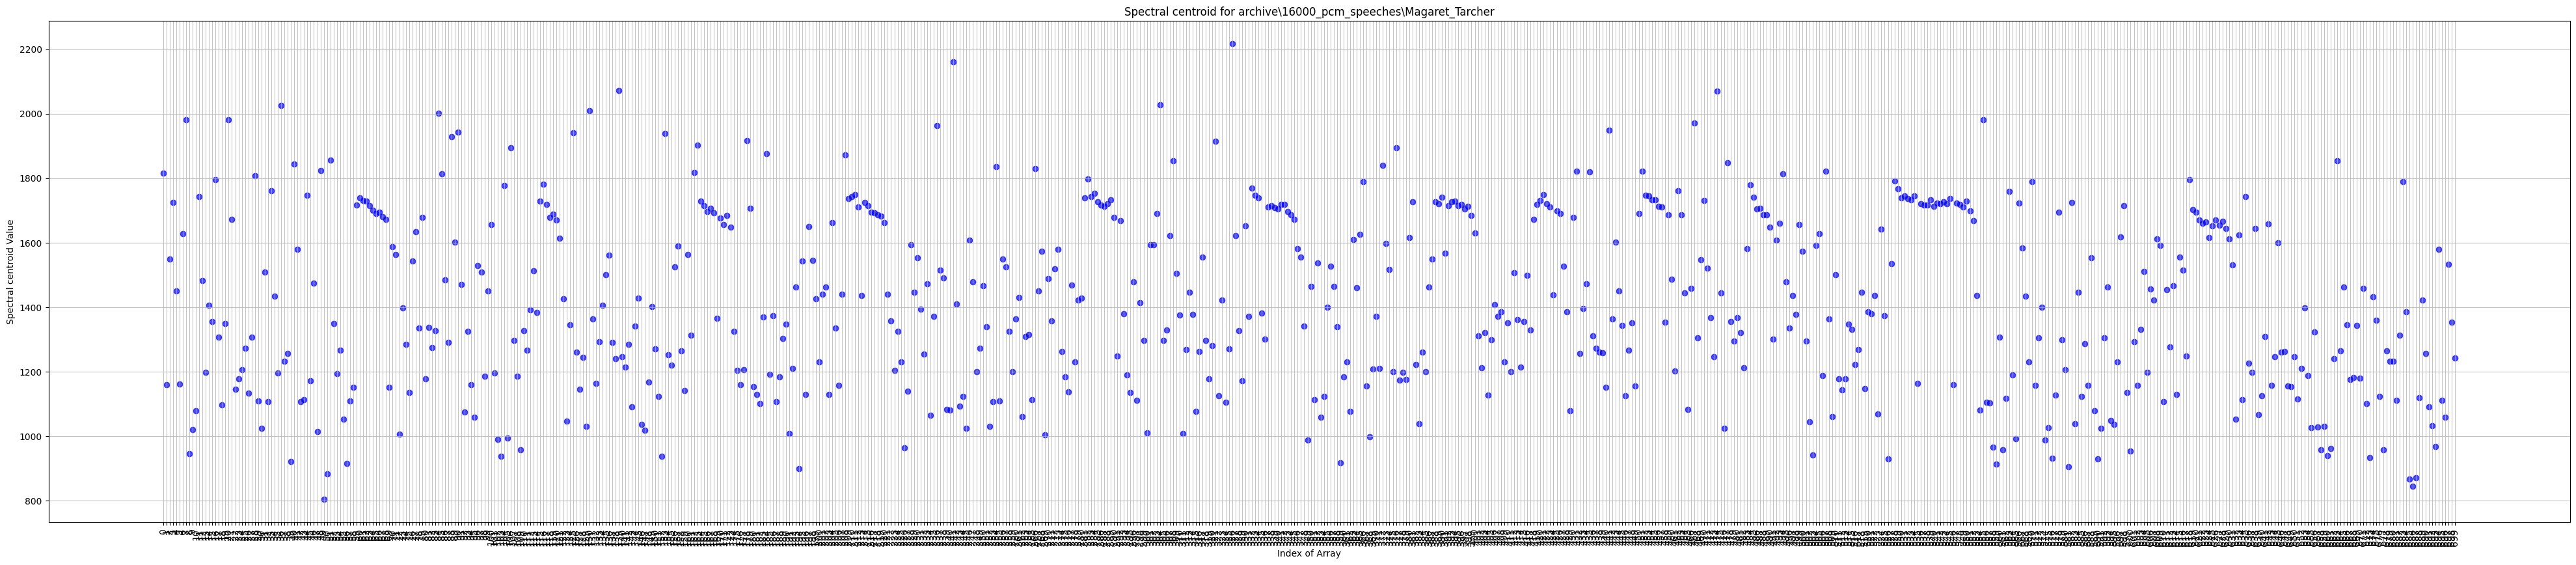

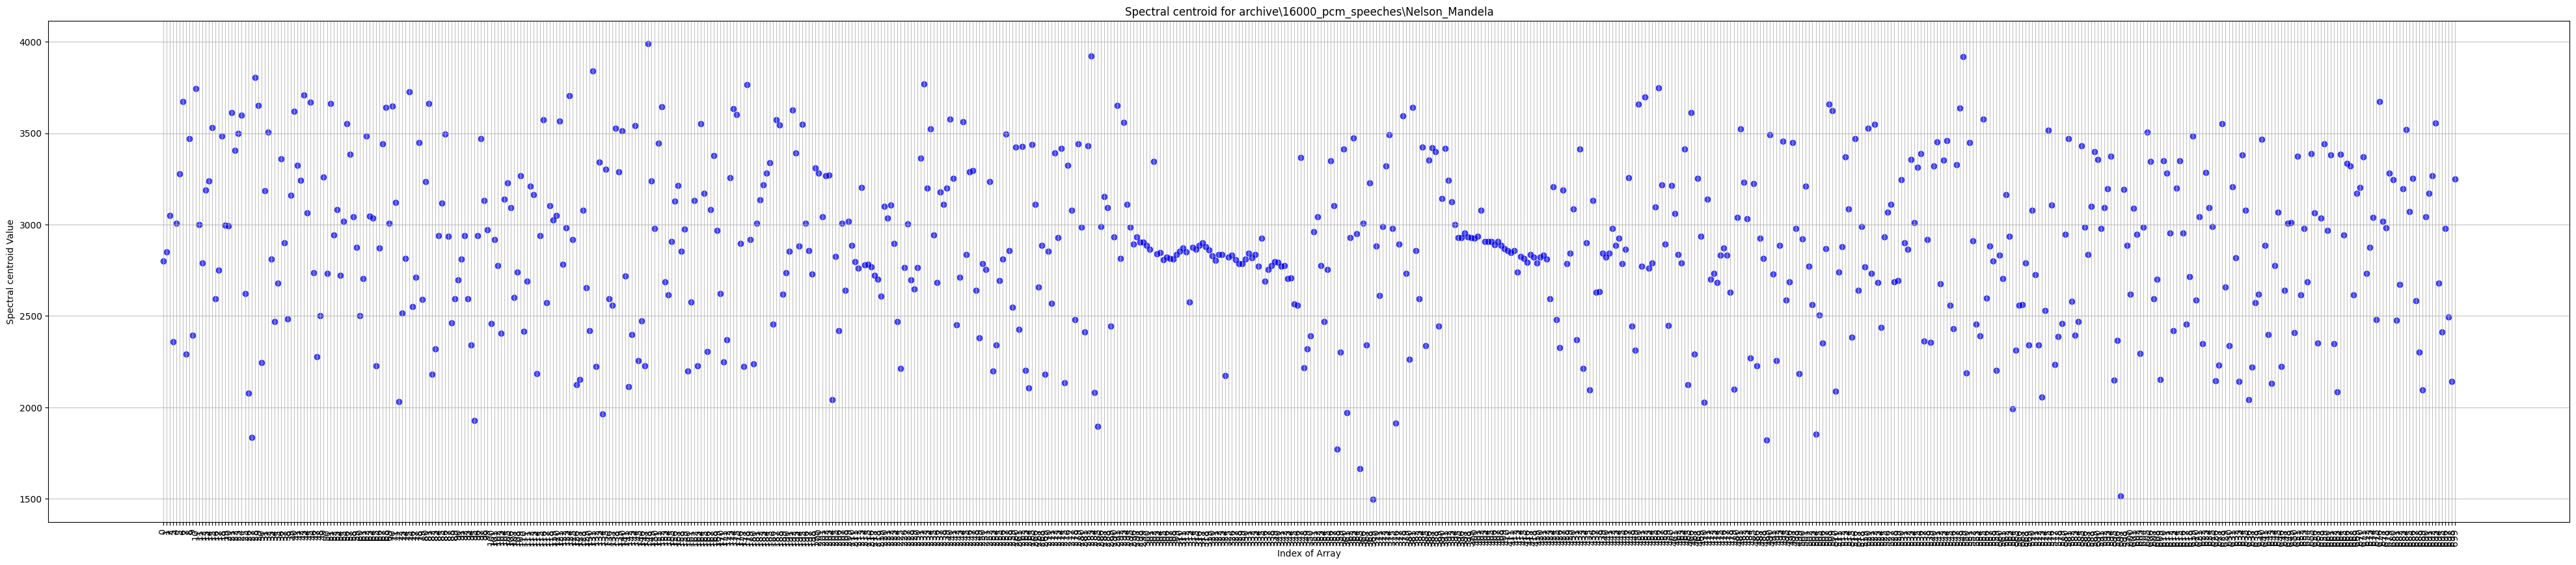

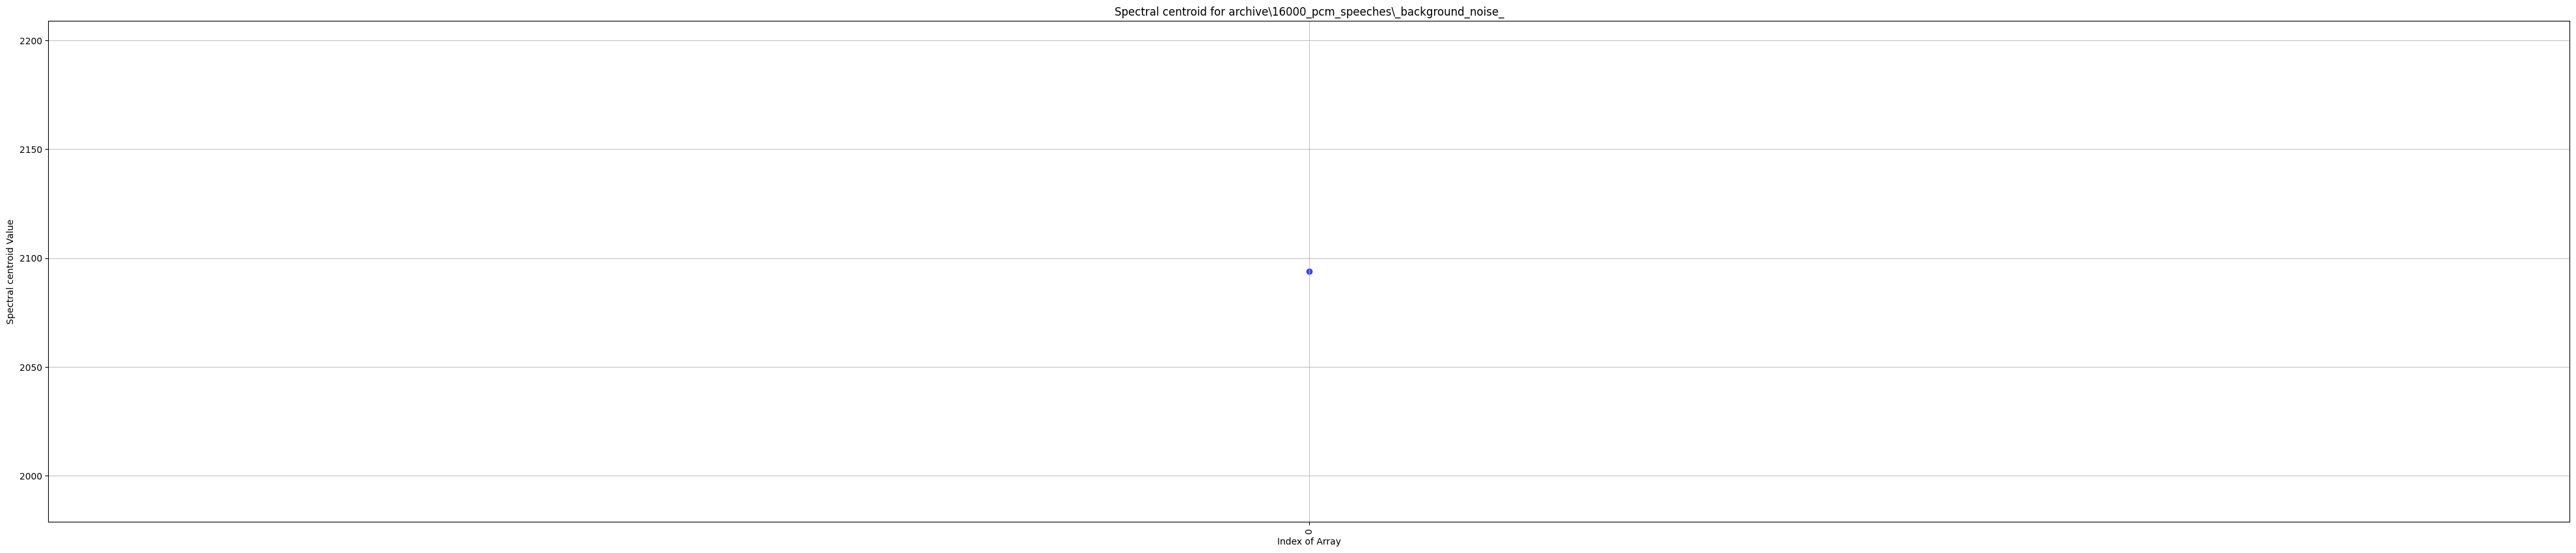

In [ ]:
import re
def plot_centroid_for_folder(folder_path):
    for root, dirs, files in os.walk(folder_path):
        centroid_values = []
        file_indices = []

        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                data, sr = librosa.load(file_path, sr=None)

                spectral_centroids = librosa.feature.spectral_centroid(y=data, sr=sr)
                mean_centroid = spectral_centroids.mean()
                match = re.match(r'(\d+)', file)
                if match:
                    file_index = int(match.group(1))
                    file_indices.append(file_index)
                    centroid_values.append(mean_centroid)
        centroid_values = centroid_values[:700] 
        
        if centroid_values:
            plt.figure(figsize=(50, 10))
            plt.scatter(range(len(centroid_values)), centroid_values, color='b', alpha=0.7)  # Using scatter plot
            plt.title(f'Spectral centroid for {root}')
            plt.xlabel('Index of Array')
            plt.ylabel('Spectral centroid Value')
            plt.xticks(range(len(centroid_values)), range(len(centroid_values)), rotation=90)
            plt.grid(axis='both', alpha=0.75)
            plt.show()

for entry in os.scandir(audio_files_dir):
    if entry.is_dir():
        plot_centroid_for_folder(entry.path)


In [ ]:
for root, dirs, files in os.walk(audio_files_dir):
    print(root, files)       


archive\16000_pcm_speeches ['tf_Wav_reader.py']
archive\16000_pcm_speeches\Benjamin_Netanyau ['0.wav', '1.wav', '10.wav', '100.wav', '1000.wav', '1001.wav', '1002.wav', '1003.wav', '1004.wav', '1005.wav', '1006.wav', '1007.wav', '1008.wav', '1009.wav', '101.wav', '1010.wav', '1011.wav', '1012.wav', '1013.wav', '1014.wav', '1015.wav', '1016.wav', '1017.wav', '1018.wav', '1019.wav', '102.wav', '1020.wav', '1021.wav', '1022.wav', '1023.wav', '1024.wav', '1025.wav', '1026.wav', '1027.wav', '1028.wav', '1029.wav', '103.wav', '1030.wav', '1031.wav', '1032.wav', '1033.wav', '1034.wav', '1035.wav', '1036.wav', '1037.wav', '1038.wav', '1039.wav', '104.wav', '1040.wav', '1041.wav', '1042.wav', '1043.wav', '1044.wav', '1045.wav', '1046.wav', '1047.wav', '1048.wav', '1049.wav', '105.wav', '1050.wav', '1051.wav', '1052.wav', '1053.wav', '1054.wav', '1055.wav', '1056.wav', '1057.wav', '1058.wav', '1059.wav', '106.wav', '1060.wav', '1061.wav', '1062.wav', '1063.wav', '1064.wav', '1065.wav', '1066.wav

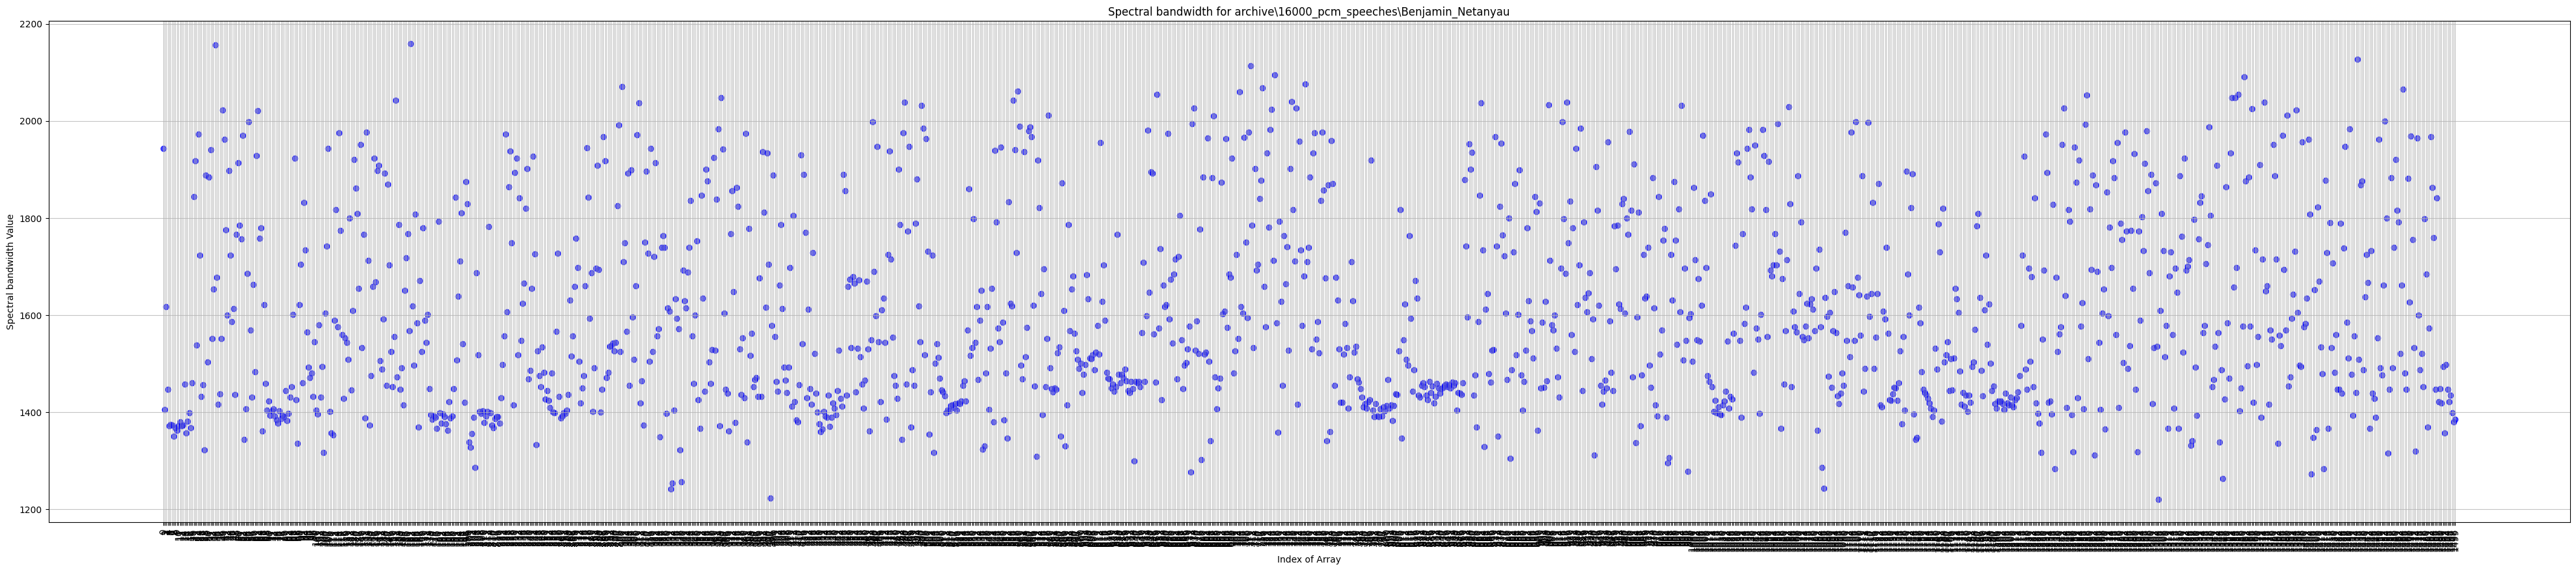

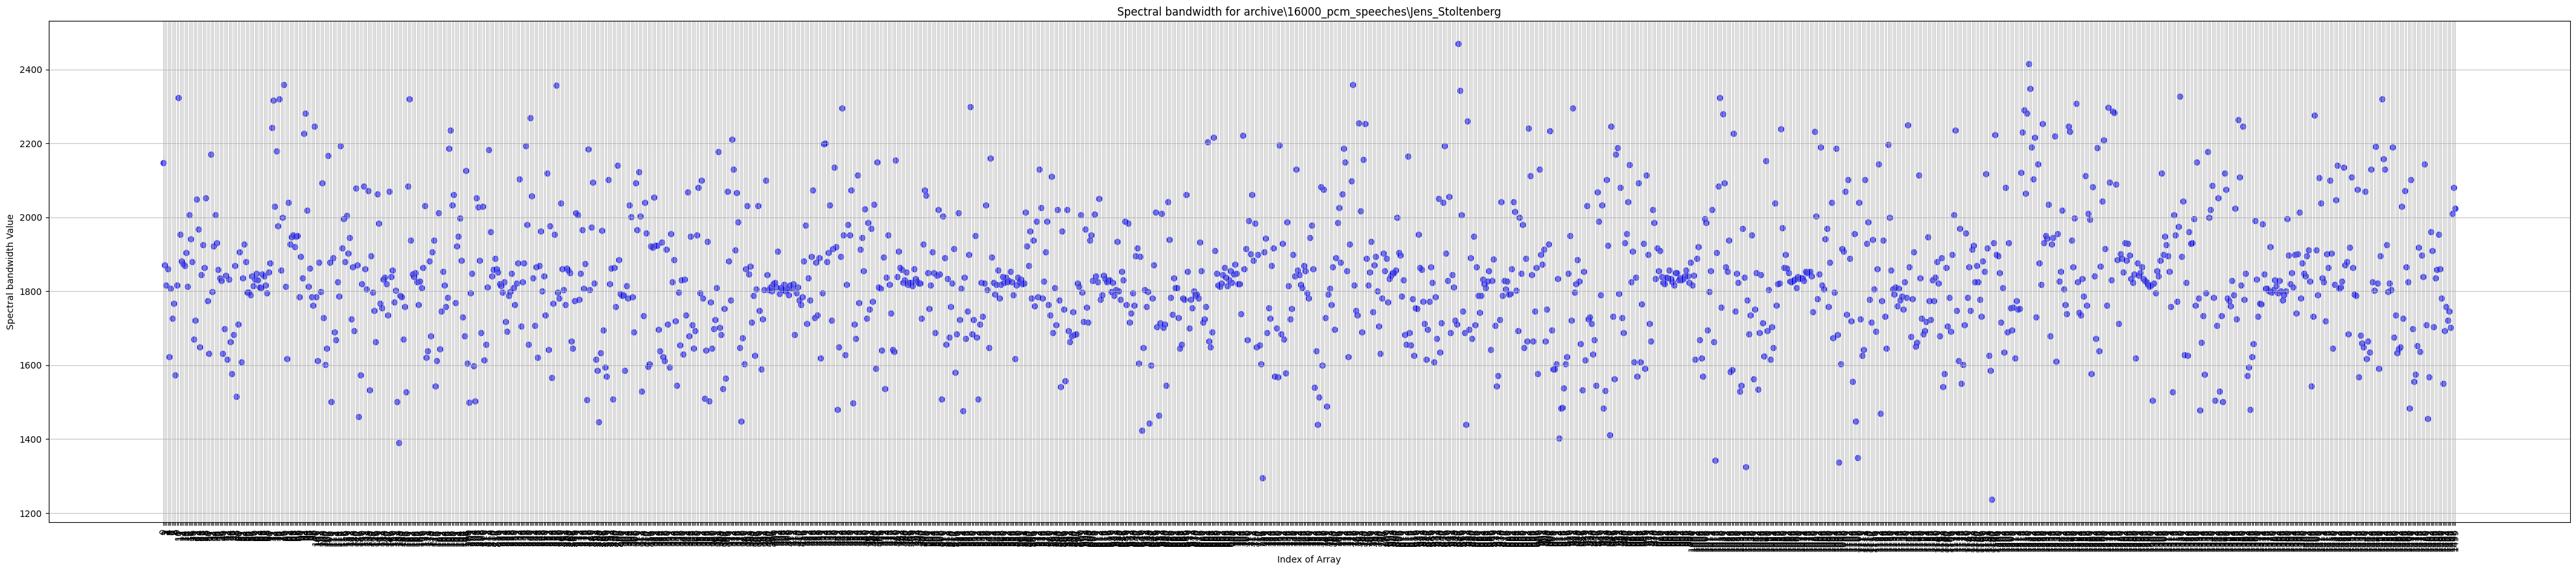

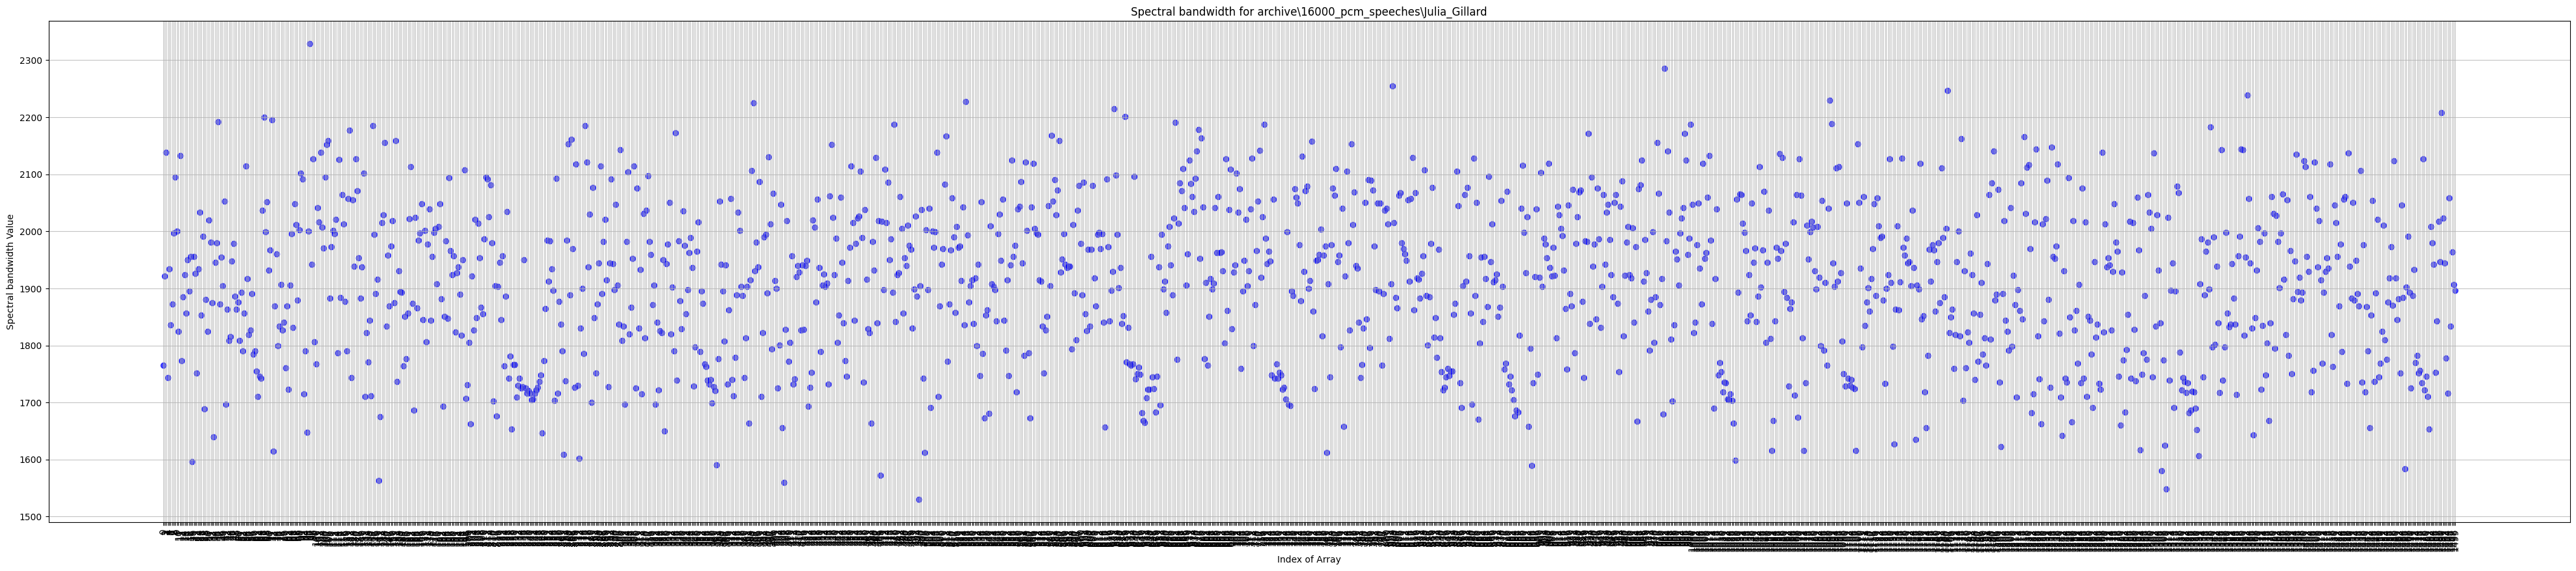

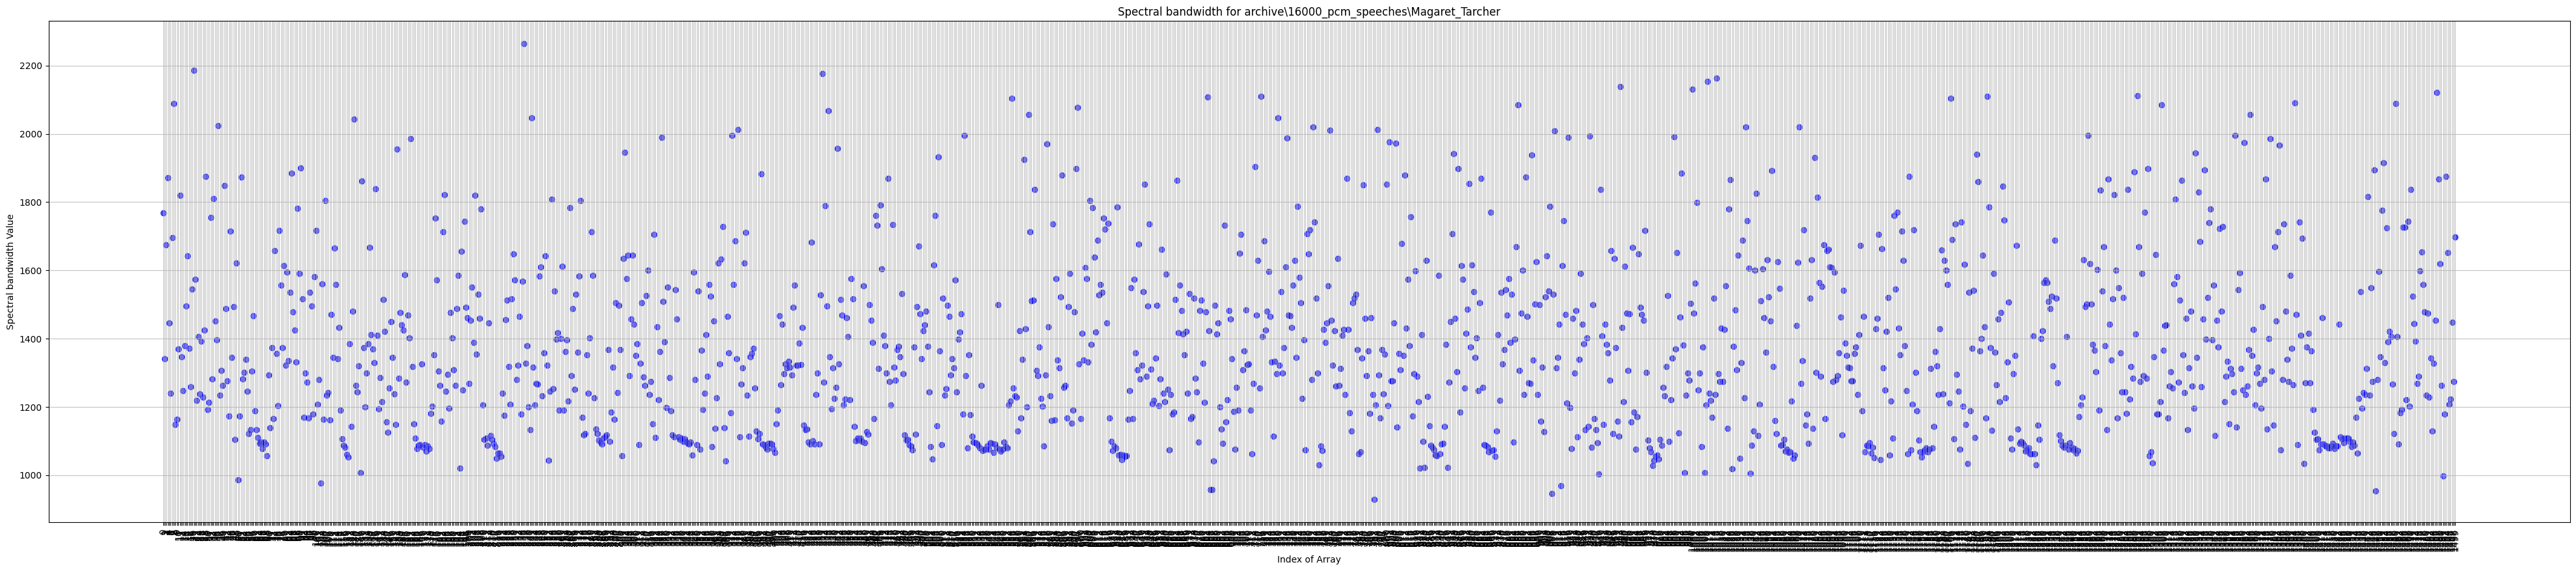

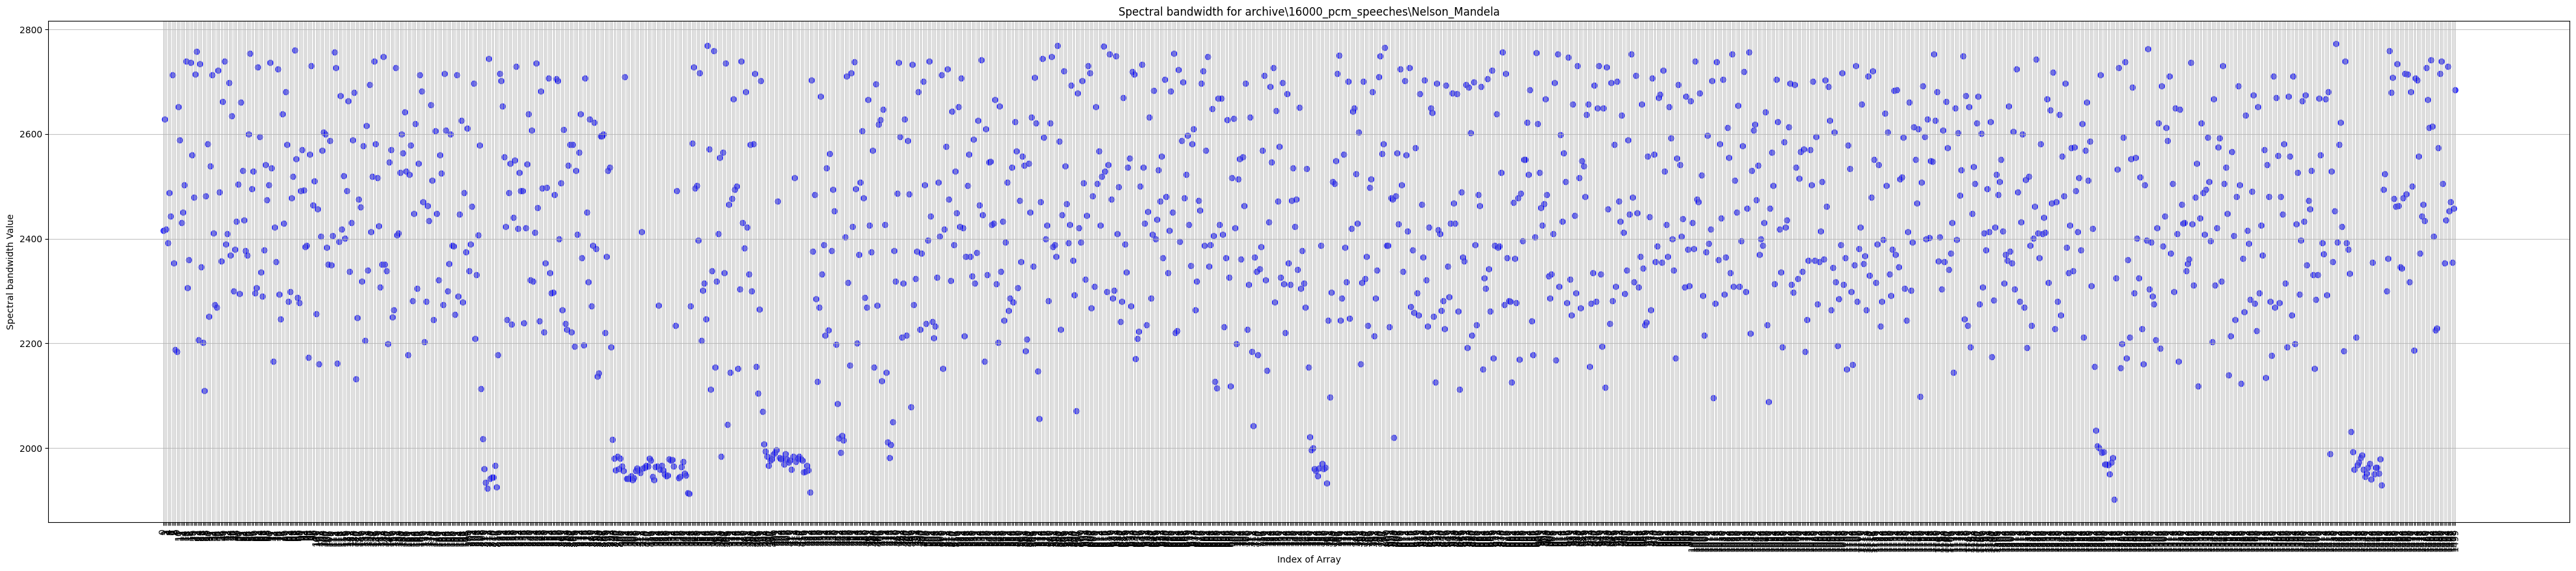

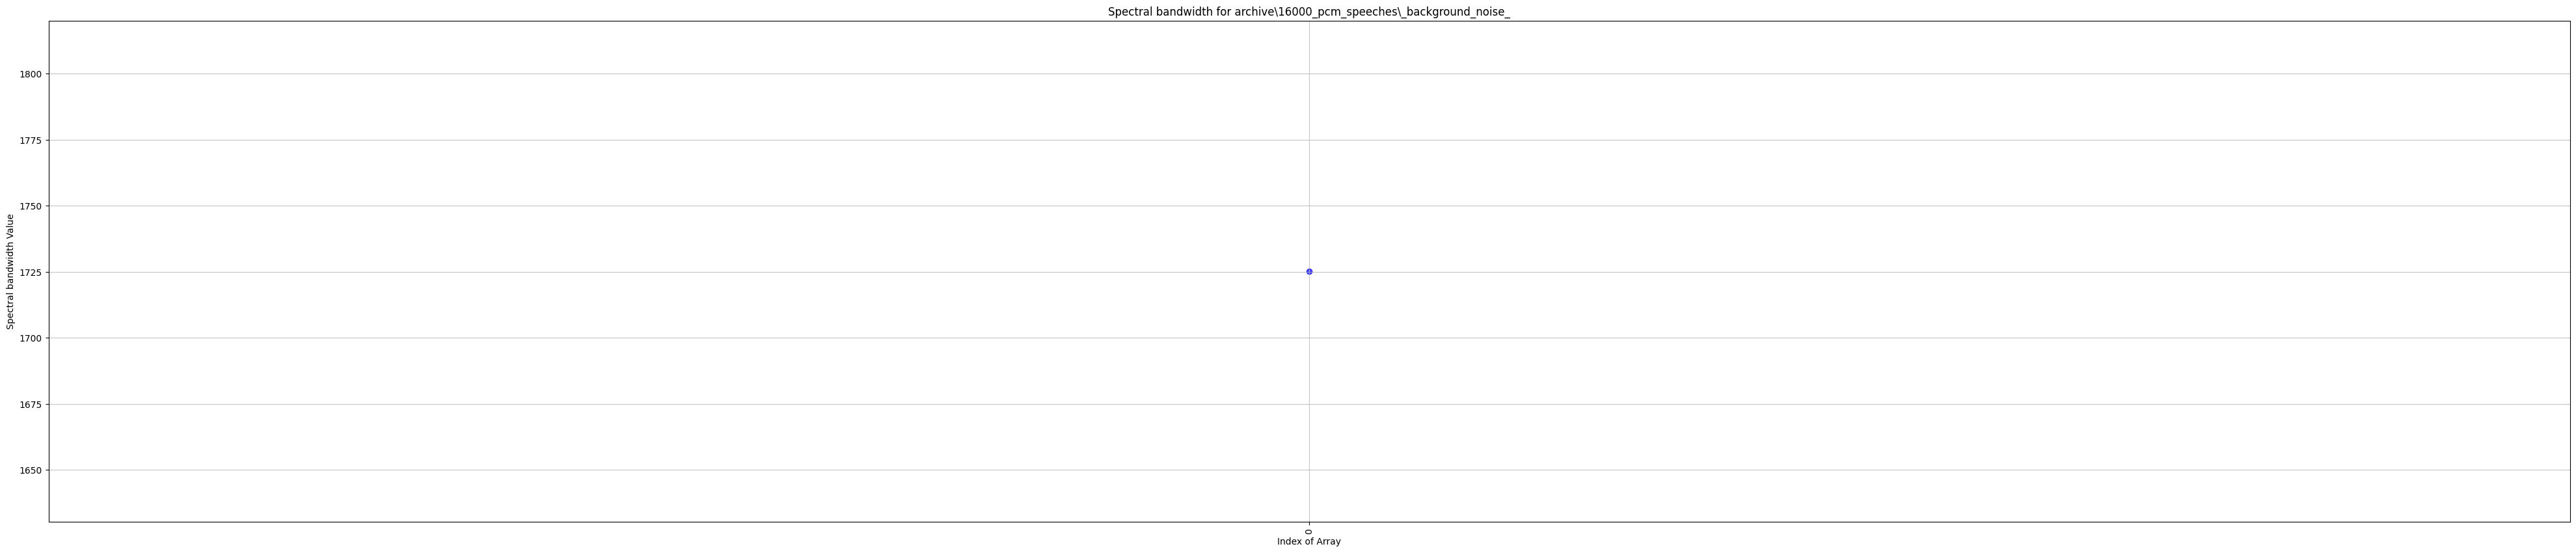

In [ ]:
def plot_bandwidth_for_folder(folder_path):
    for root, dirs, files in os.walk(folder_path):
        bandwidth_values = []
        file_indices = []
        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                try:
                    data, sr = librosa.load(file_path, sr=None)
                    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=data, sr=sr)
                    mean_bandwidth = spectral_bandwidth.mean()
                    match = re.match(r'(\d+)', file)
                    if match:
                        file_index = int(match.group(1))
                        file_indices.append(file_index)
                        bandwidth_values.append(mean_bandwidth)
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

        if len(bandwidth_values) > 0:
            plt.figure(figsize=(50, 10))
            plt.scatter(range(len(bandwidth_values)), bandwidth_values, color='b', alpha=0.7)  # Using scatter plot
            plt.title(f'Spectral bandwidth for {root}')
            plt.xlabel('Index of Array')
            plt.ylabel('Spectral bandwidth Value')
            plt.xticks(range(len(bandwidth_values)), range(len(bandwidth_values)), rotation=90)
            plt.grid(axis='both', alpha=0.75)  # To show both grid lines
            plt.show()


for entry in os.scandir(audio_files_dir):
    if entry.is_dir():
        plot_bandwidth_for_folder(entry.path)


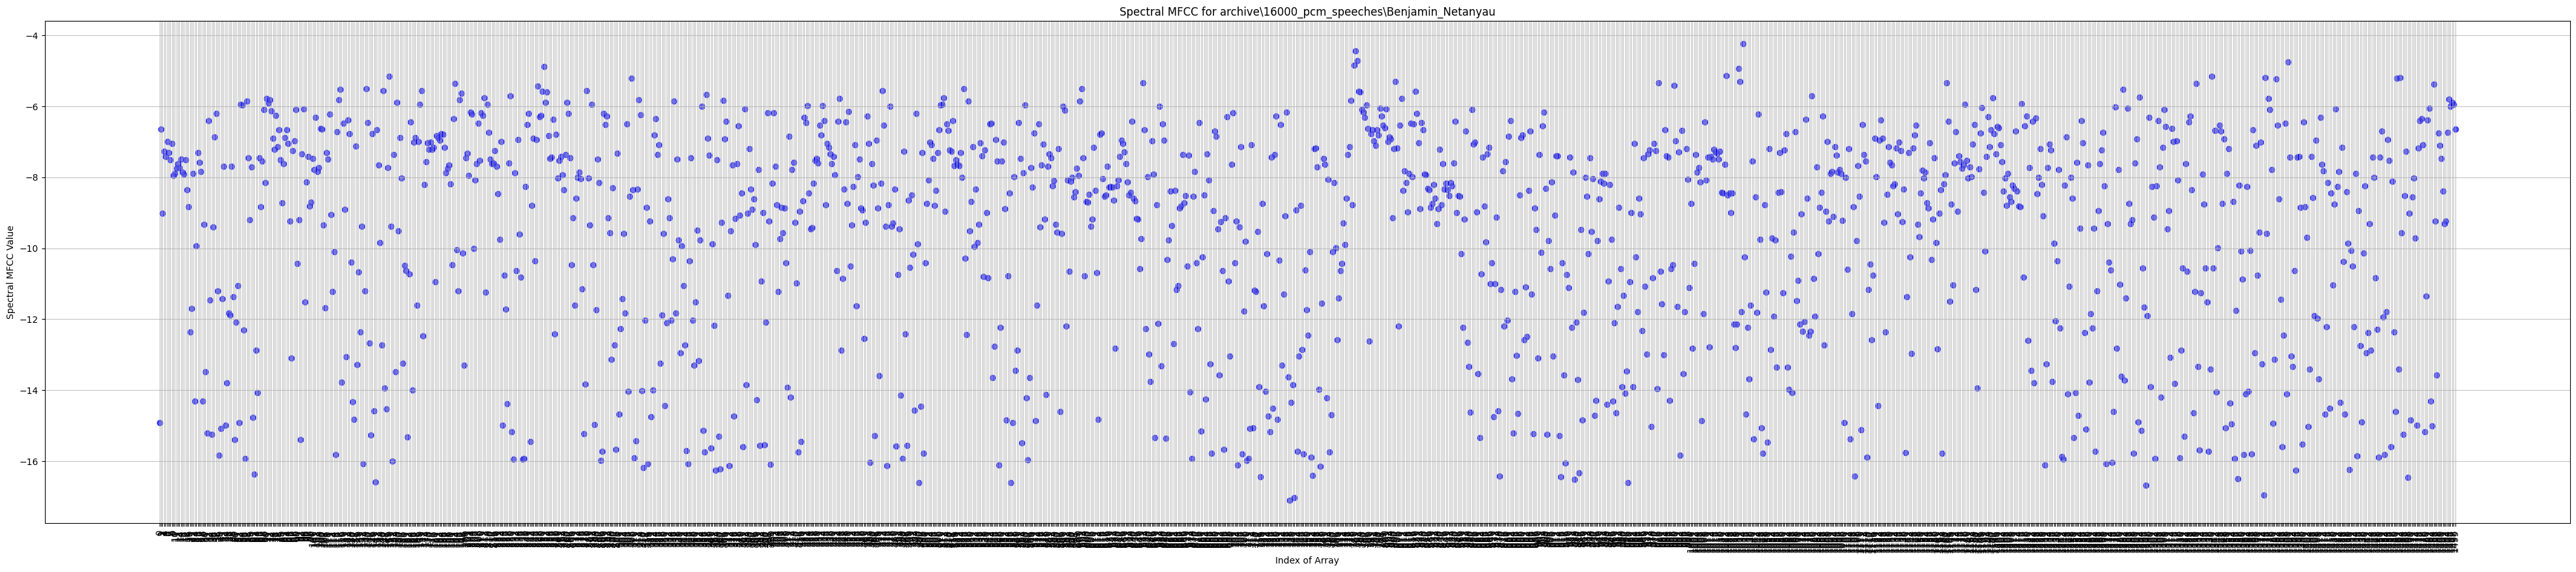

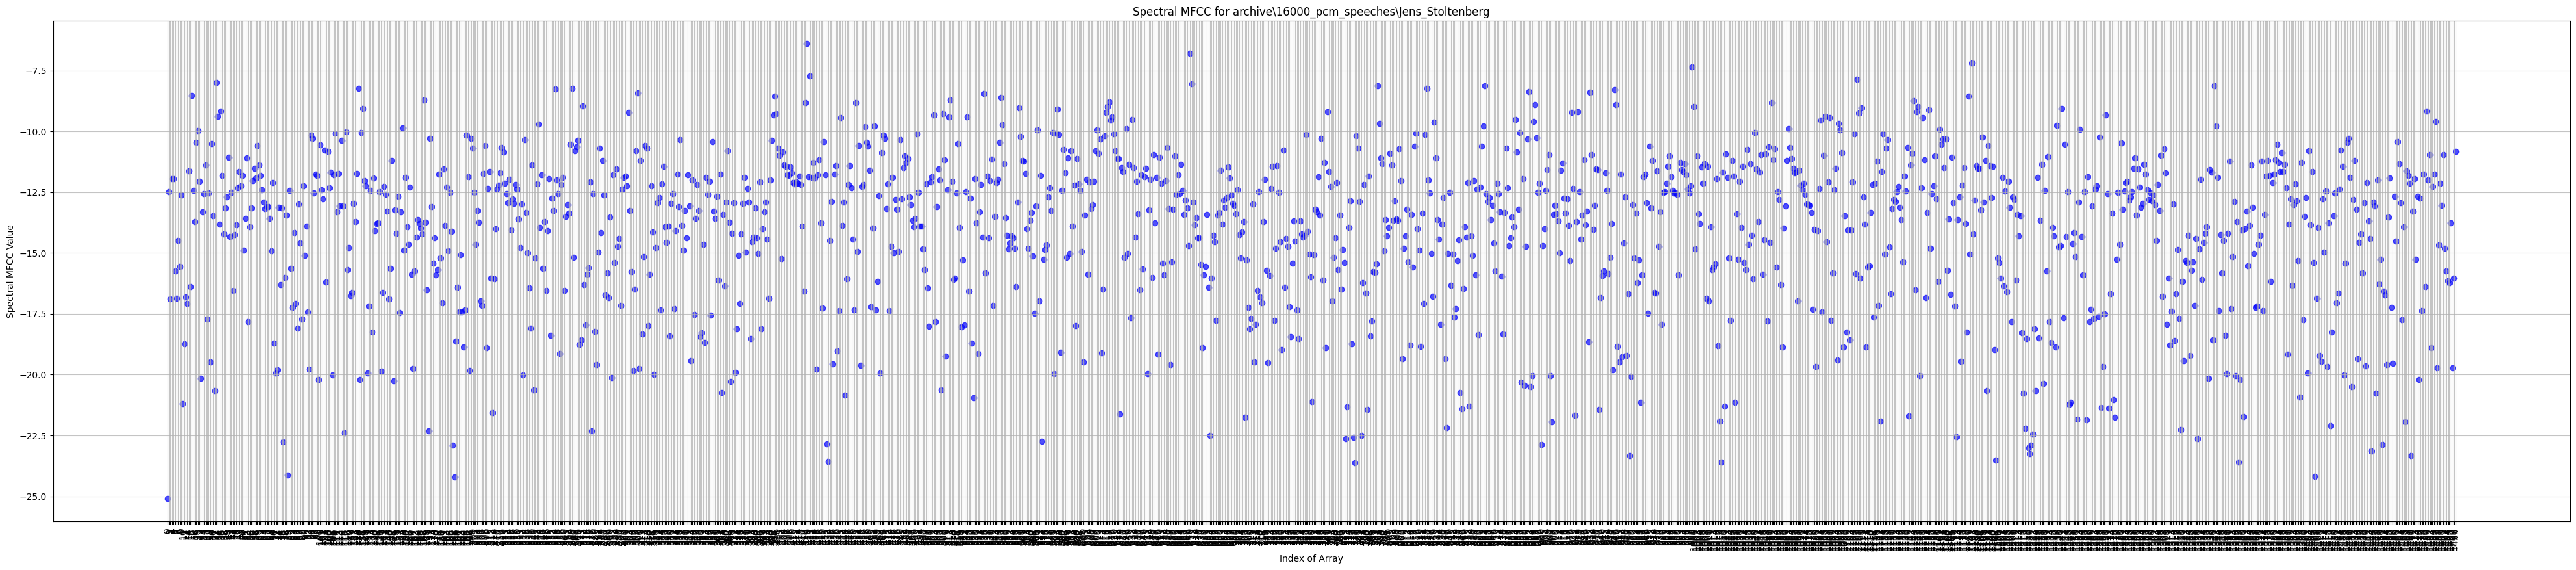

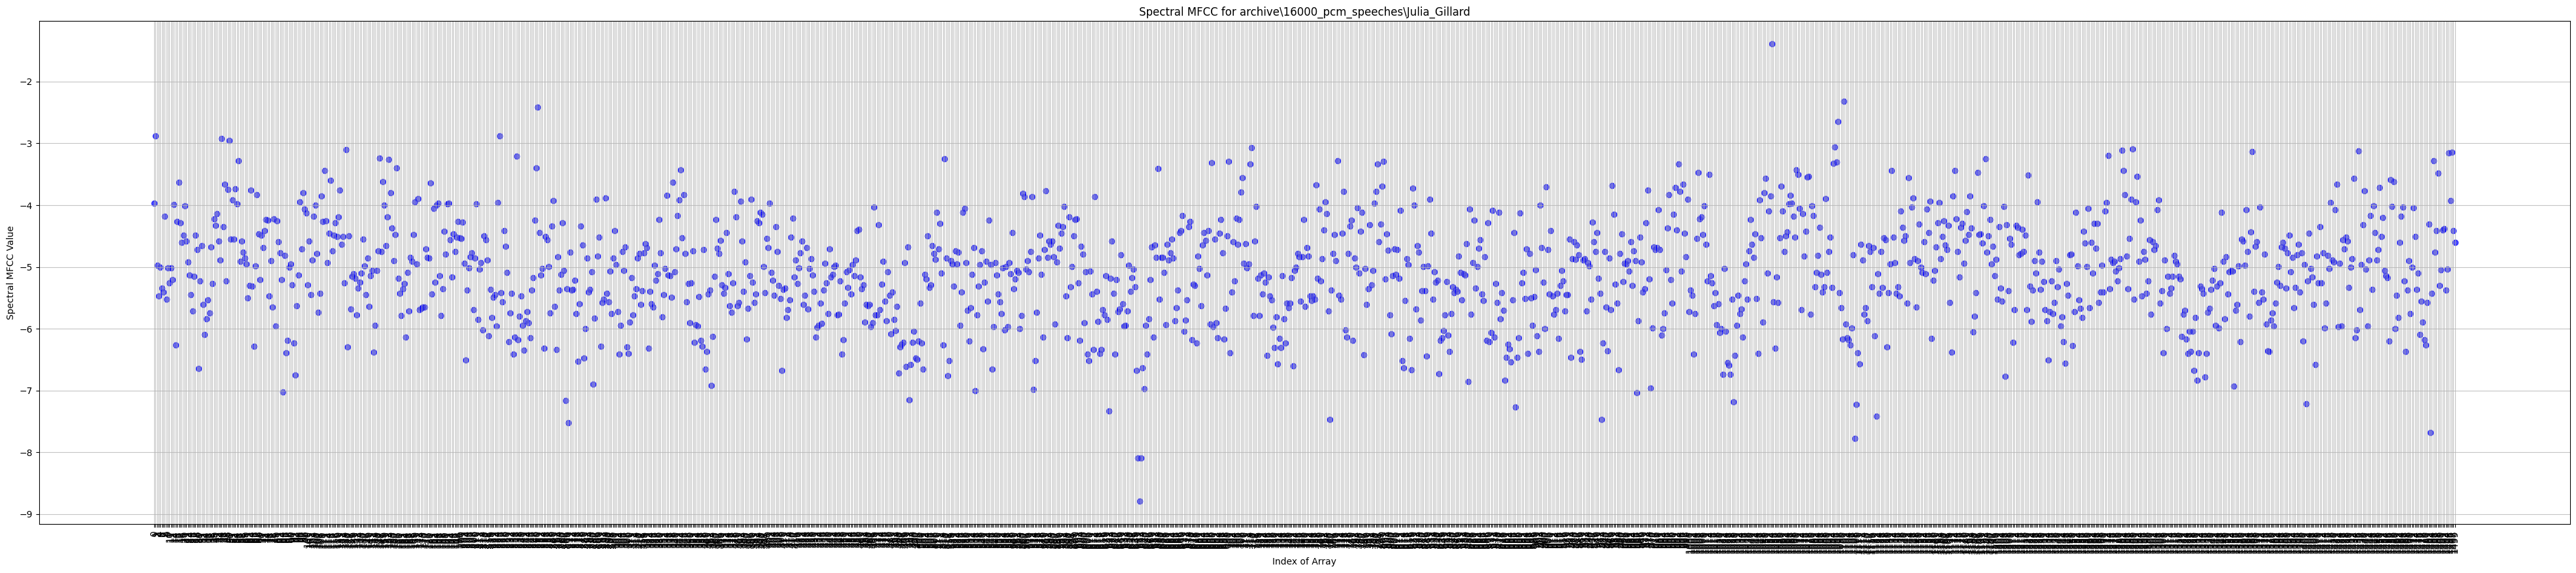

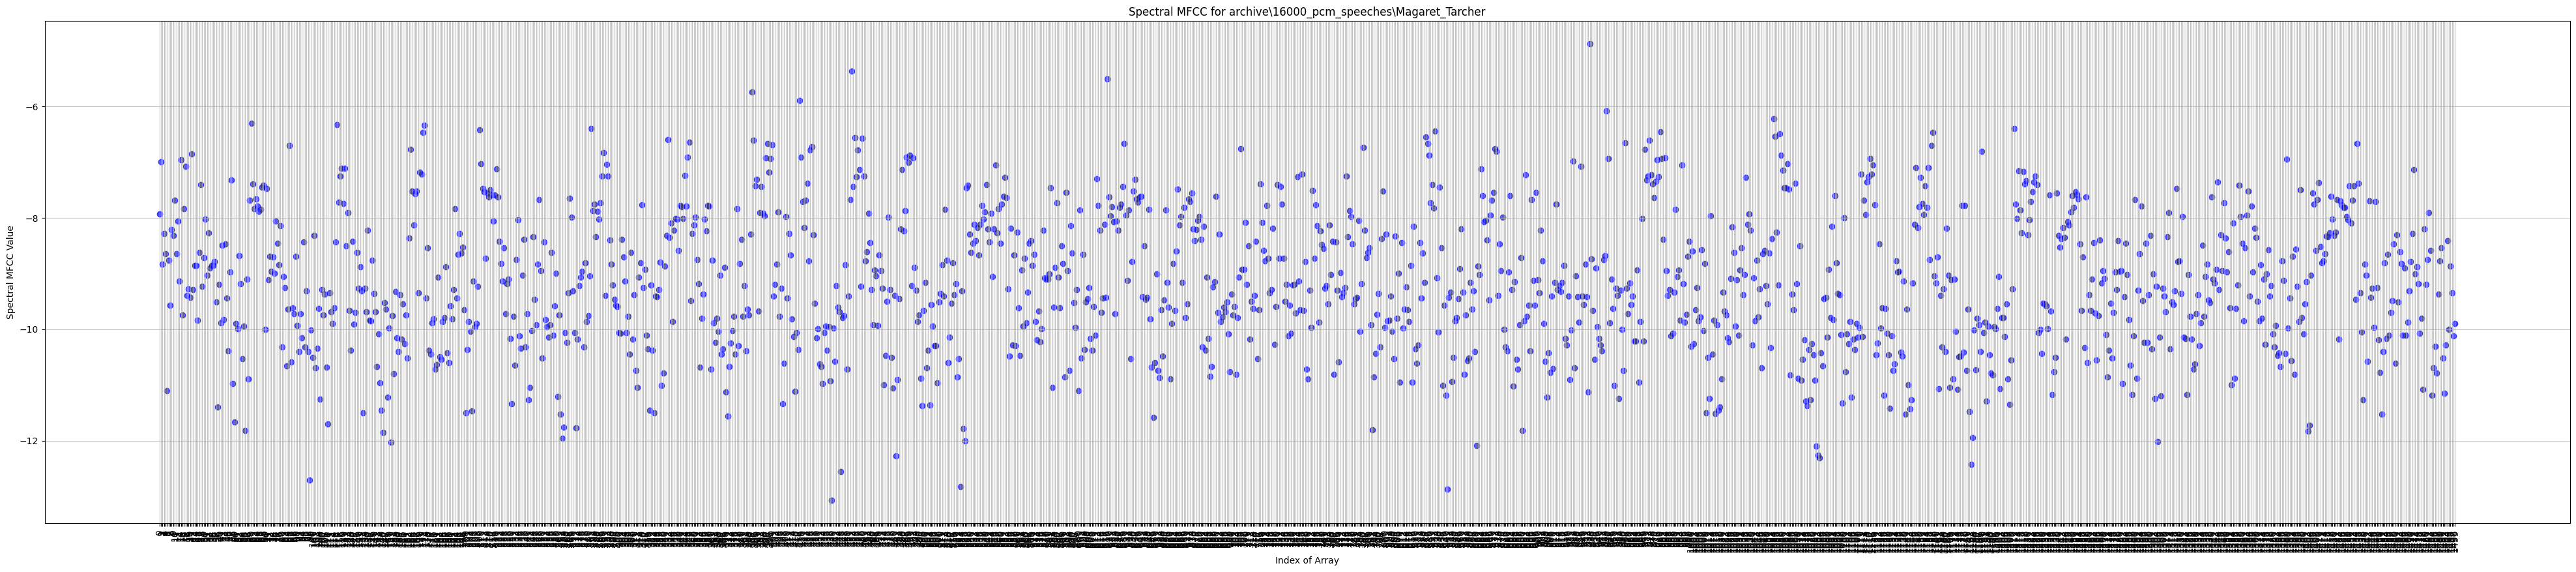

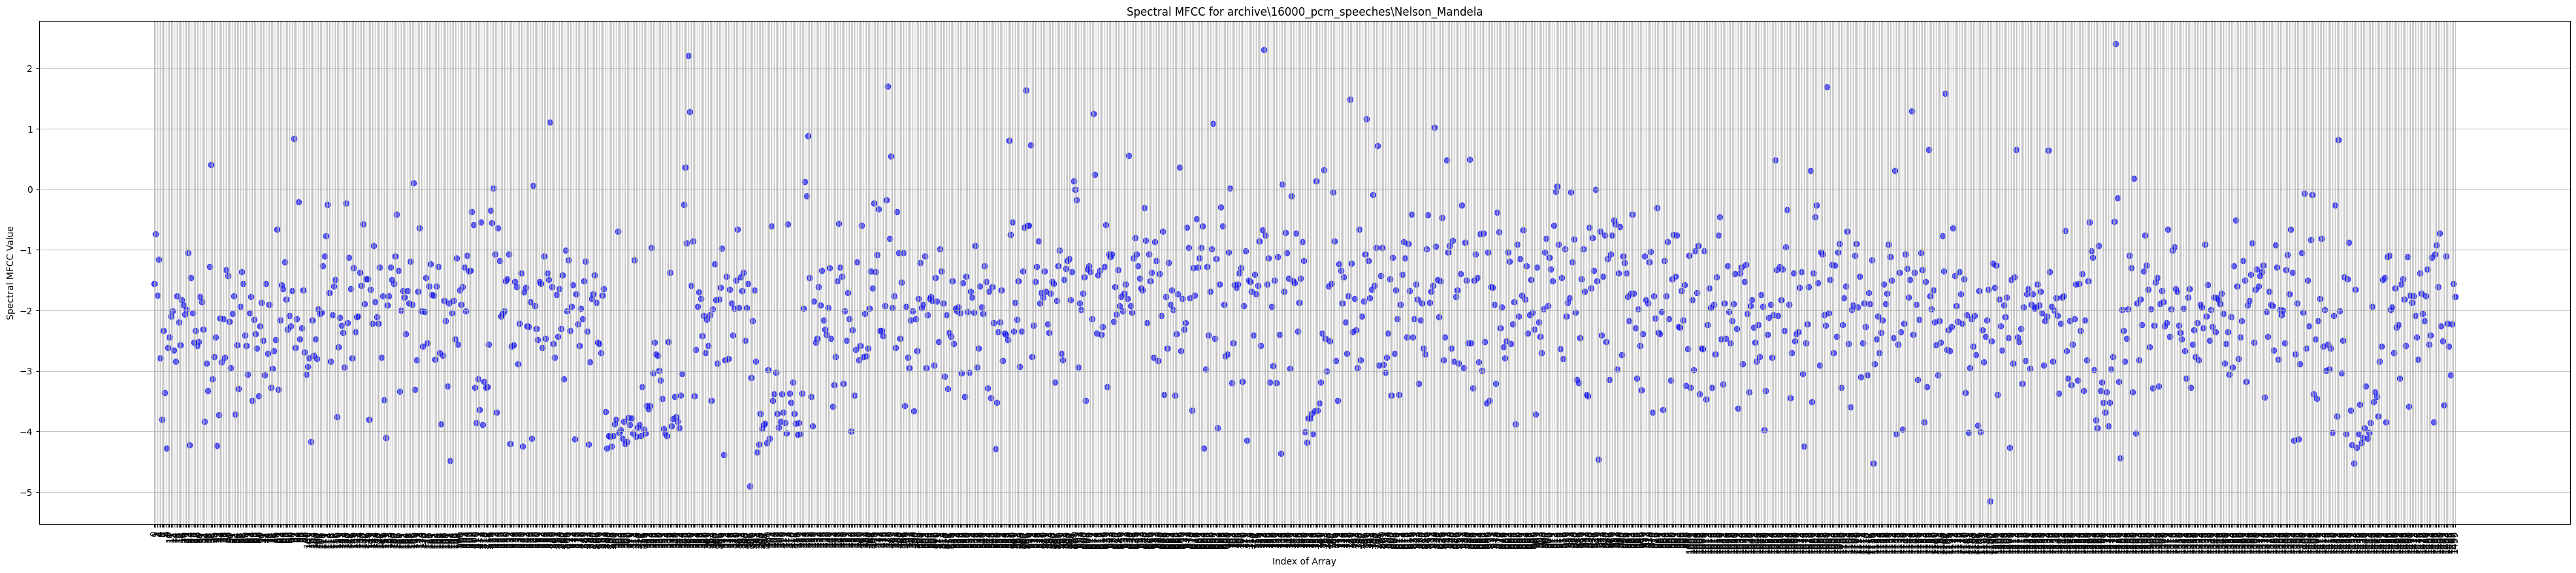

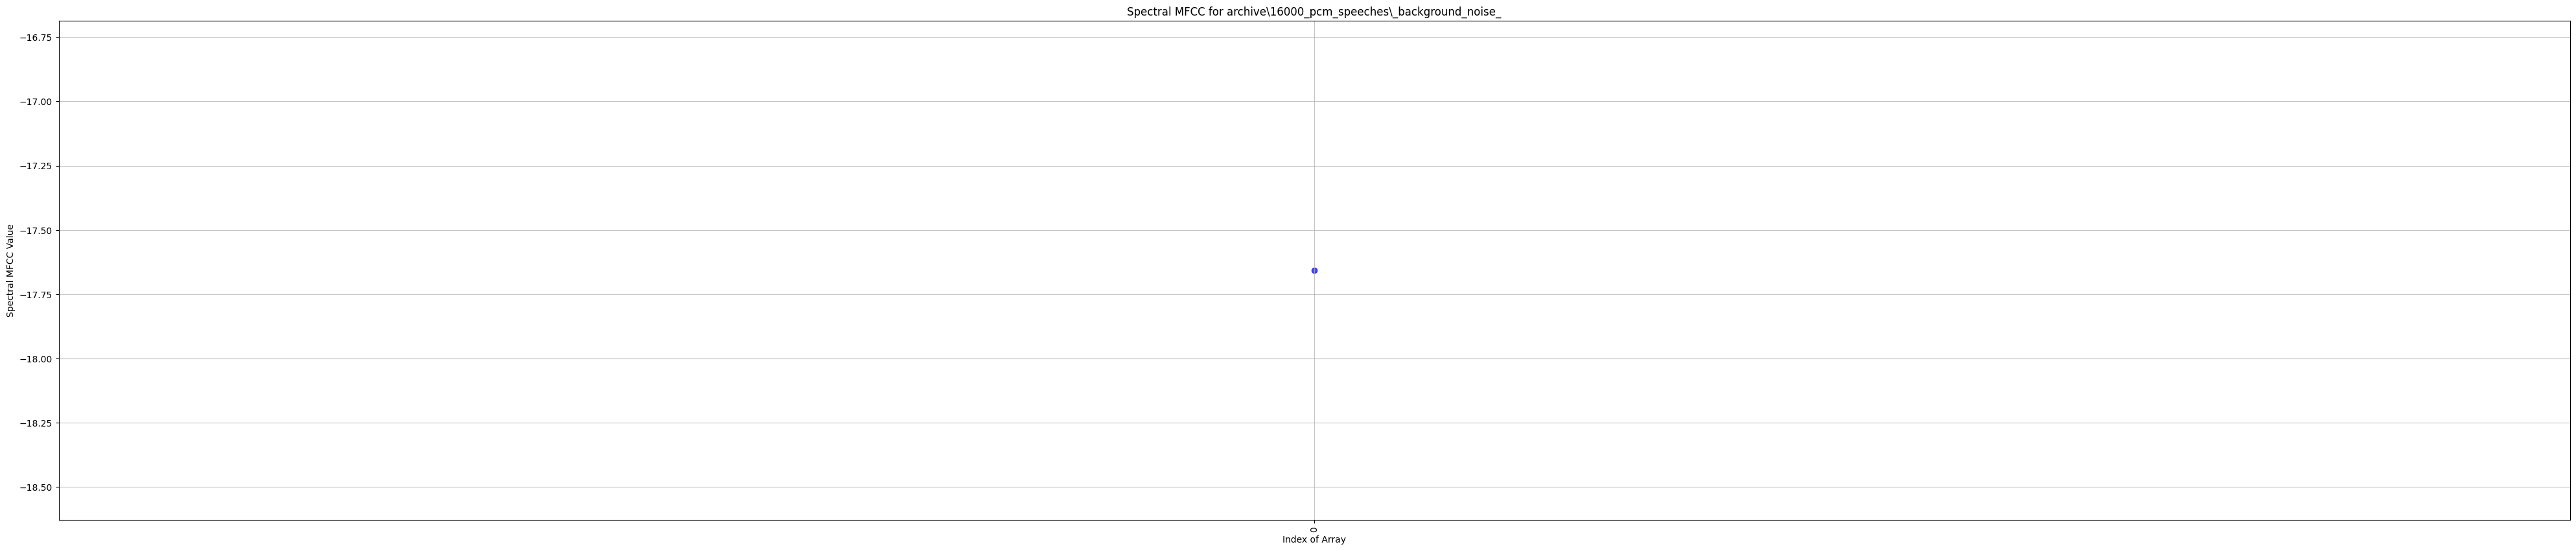

In [ ]:
def plot_mfcc_for_folder(folder_path):
    for root, dirs, files in os.walk(folder_path):
        mfcc_values = []
        file_indices = []

        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                data, sr = librosa.load(file_path, sr=None)

                mfcc = librosa.feature.mfcc(y=data, sr=sr)
                mean_mfcc = mfcc.mean()
                match = re.match(r'(\d+)', file)
                if match:
                    file_index = int(match.group(1))
                    file_indices.append(file_index)
                    mfcc_values.append(mean_mfcc)
        # print(len(mfcc_values))
        # mfcc_values = mfcc_values[:700] 
        if mfcc_values:
            plt.figure(figsize=(50, 10))
            plt.scatter(range(len(mfcc_values)), mfcc_values, color='b', alpha=0.7) 
            plt.title(f'Spectral MFCC for {root}')
            plt.xlabel('Index of Array')
            plt.ylabel('Spectral MFCC Value')
            plt.xticks(range(len(mfcc_values)), range(len(mfcc_values)), rotation=90)
            plt.grid(axis='both', alpha=0.75)
            plt.show()

for entry in os.scandir(audio_files_dir):
    if entry.is_dir():
        plot_mfcc_for_folder(entry.path)


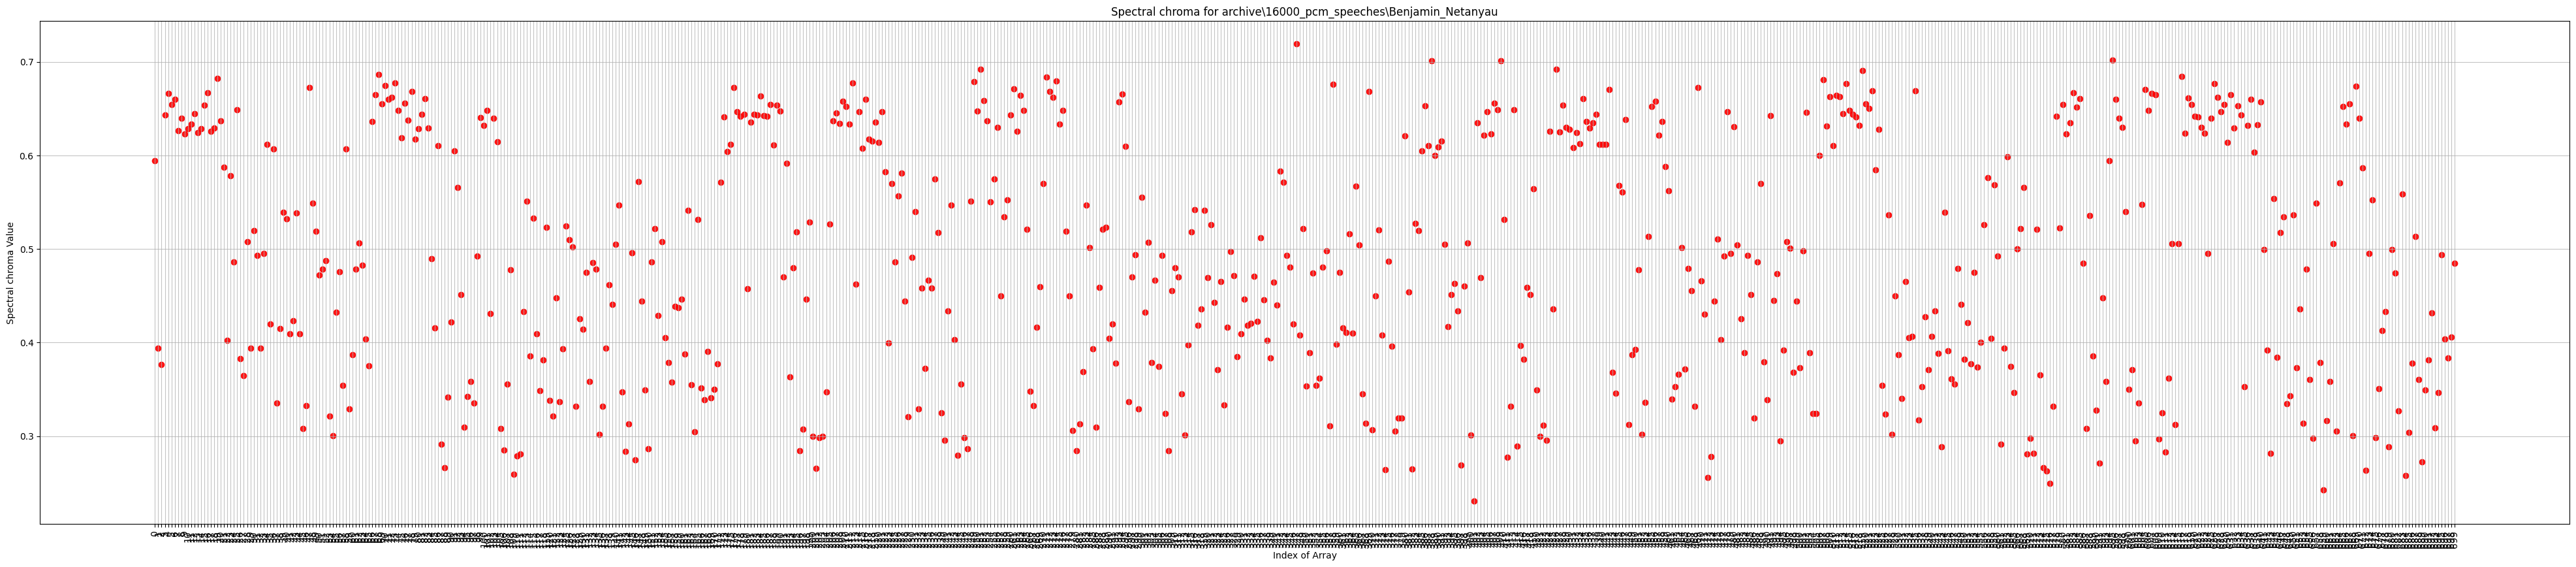

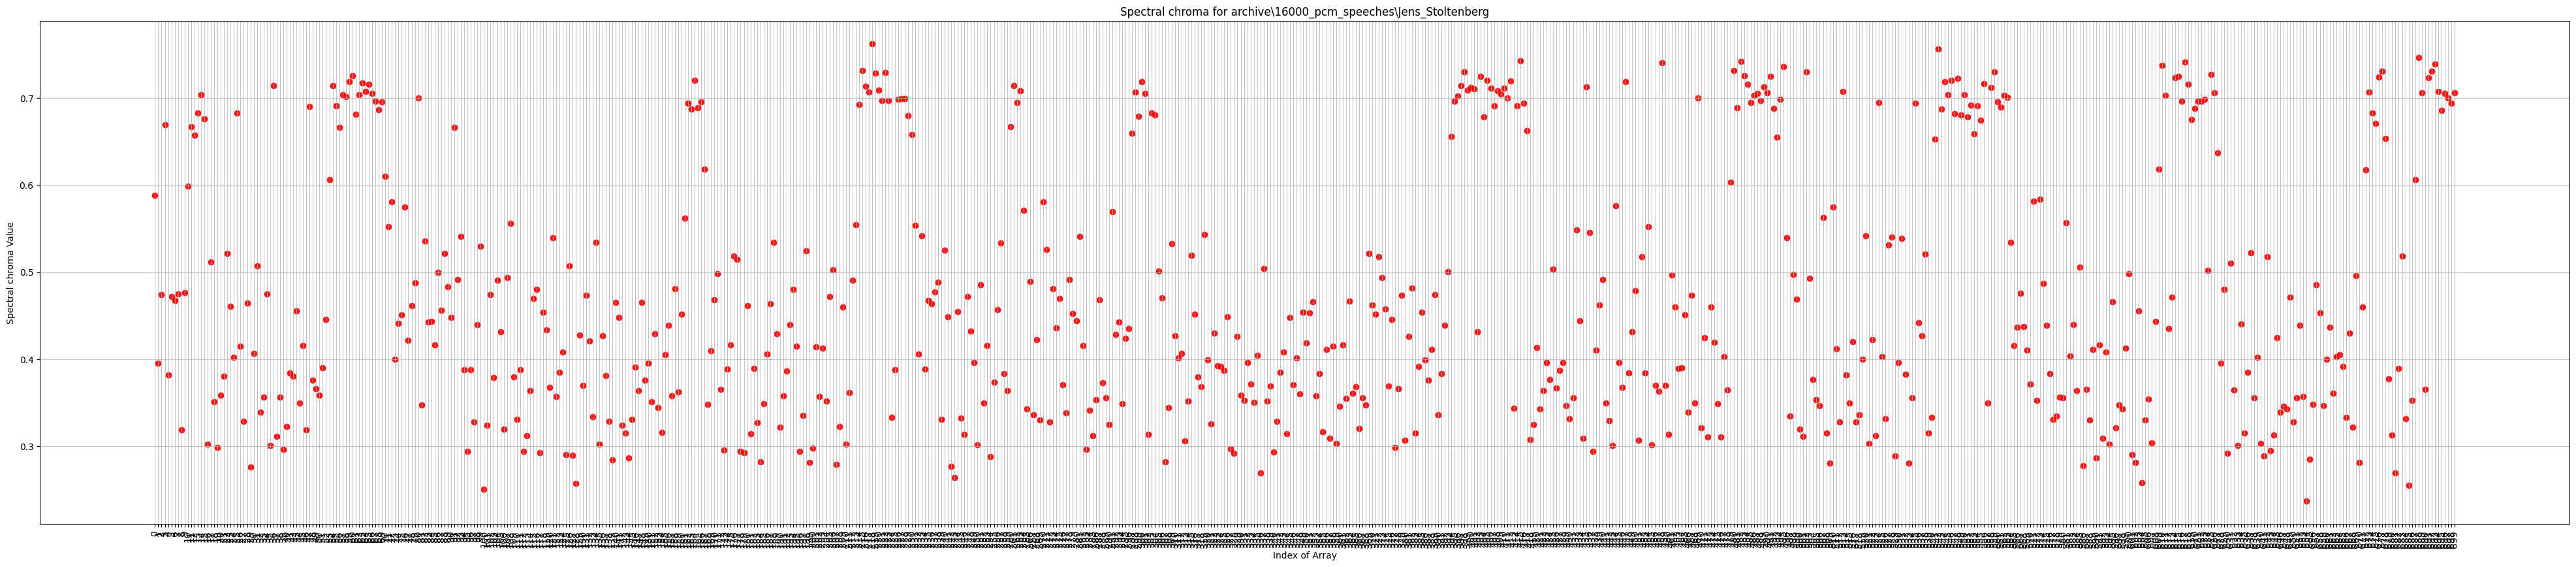

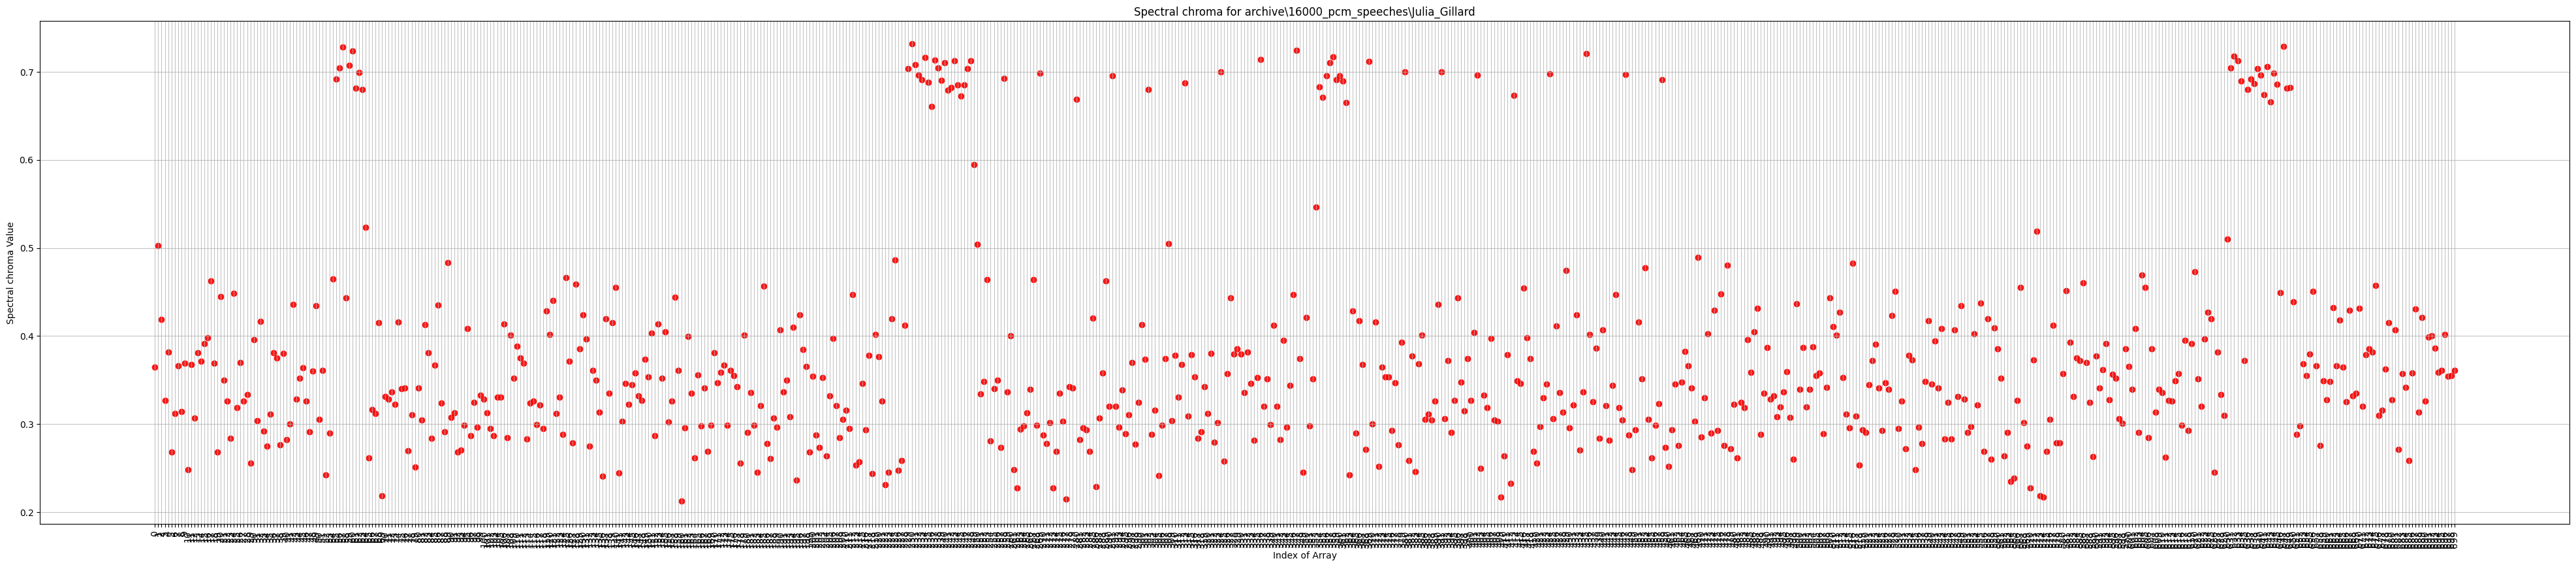

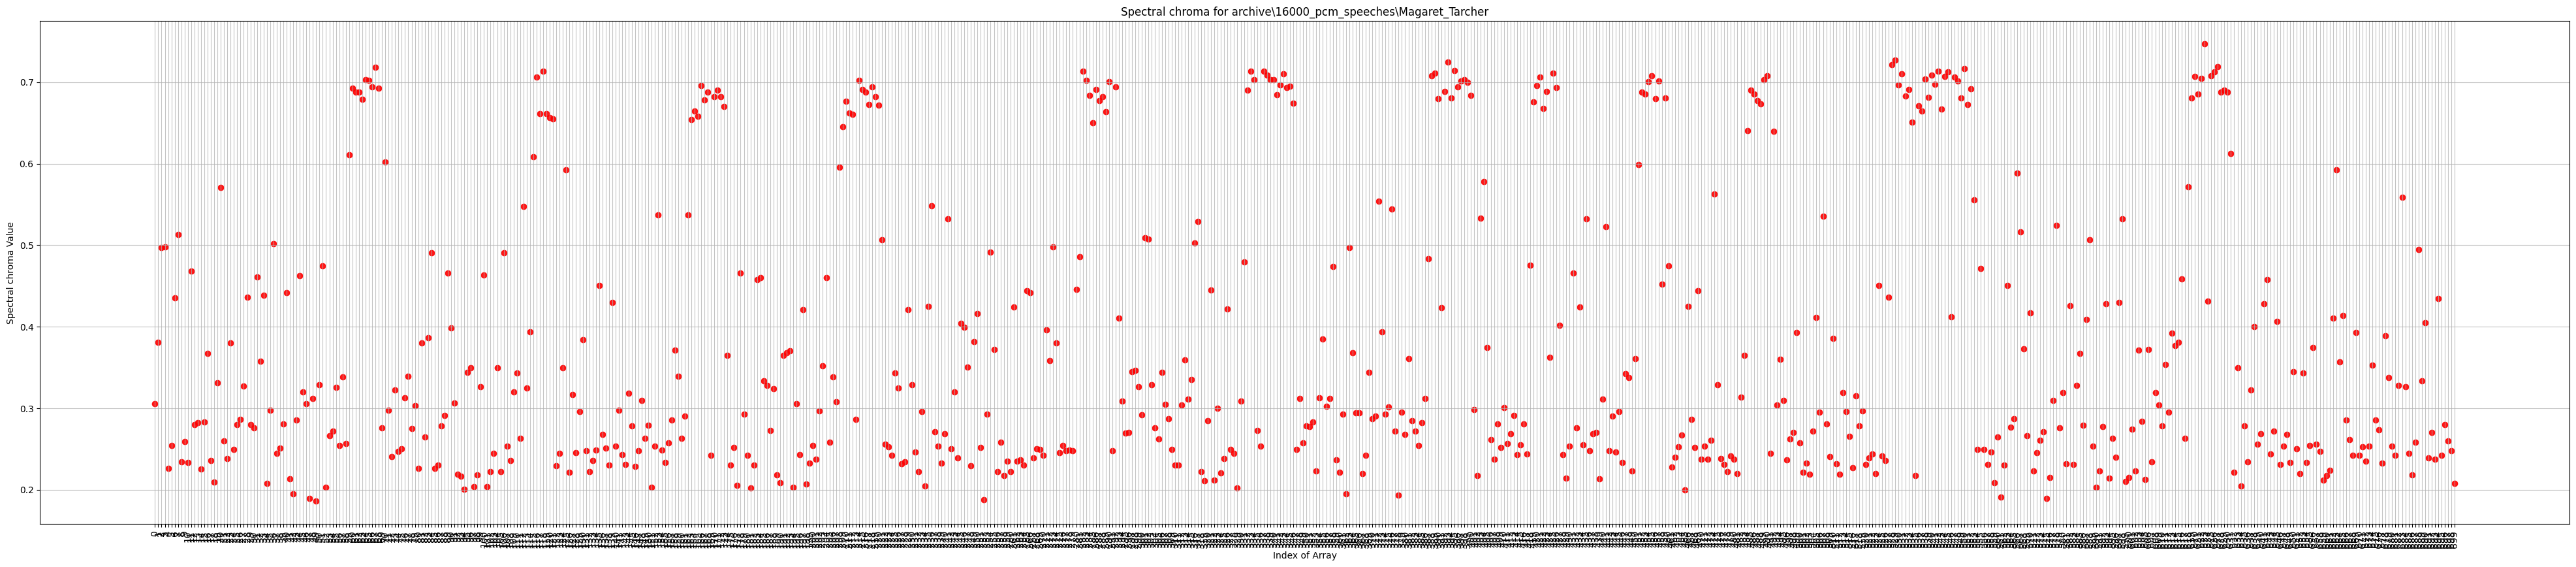

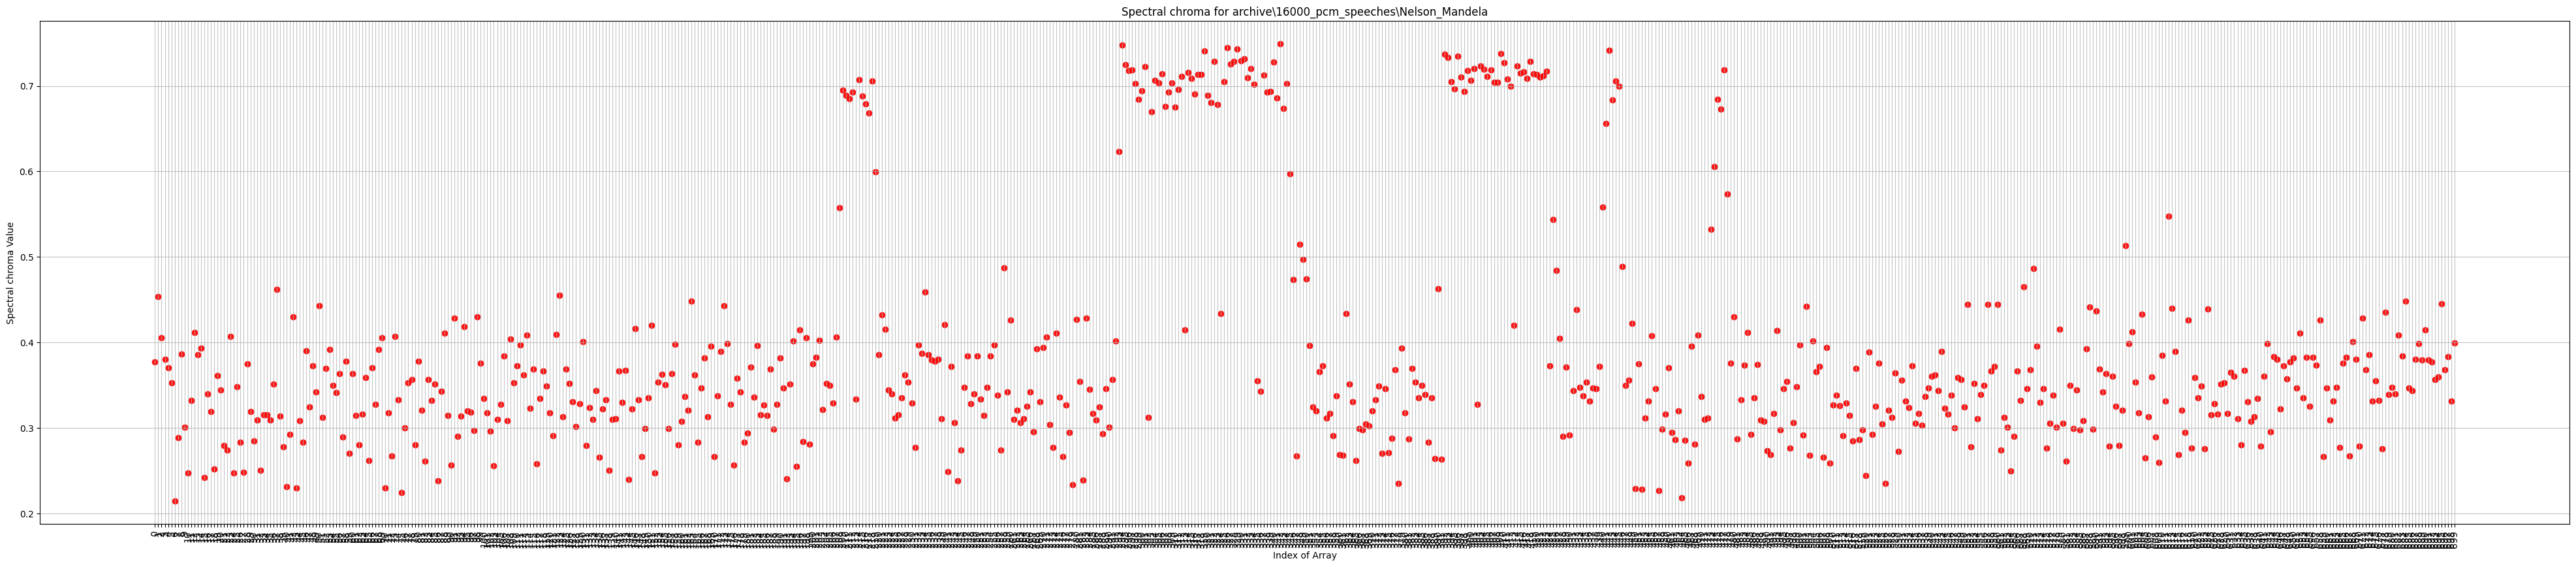

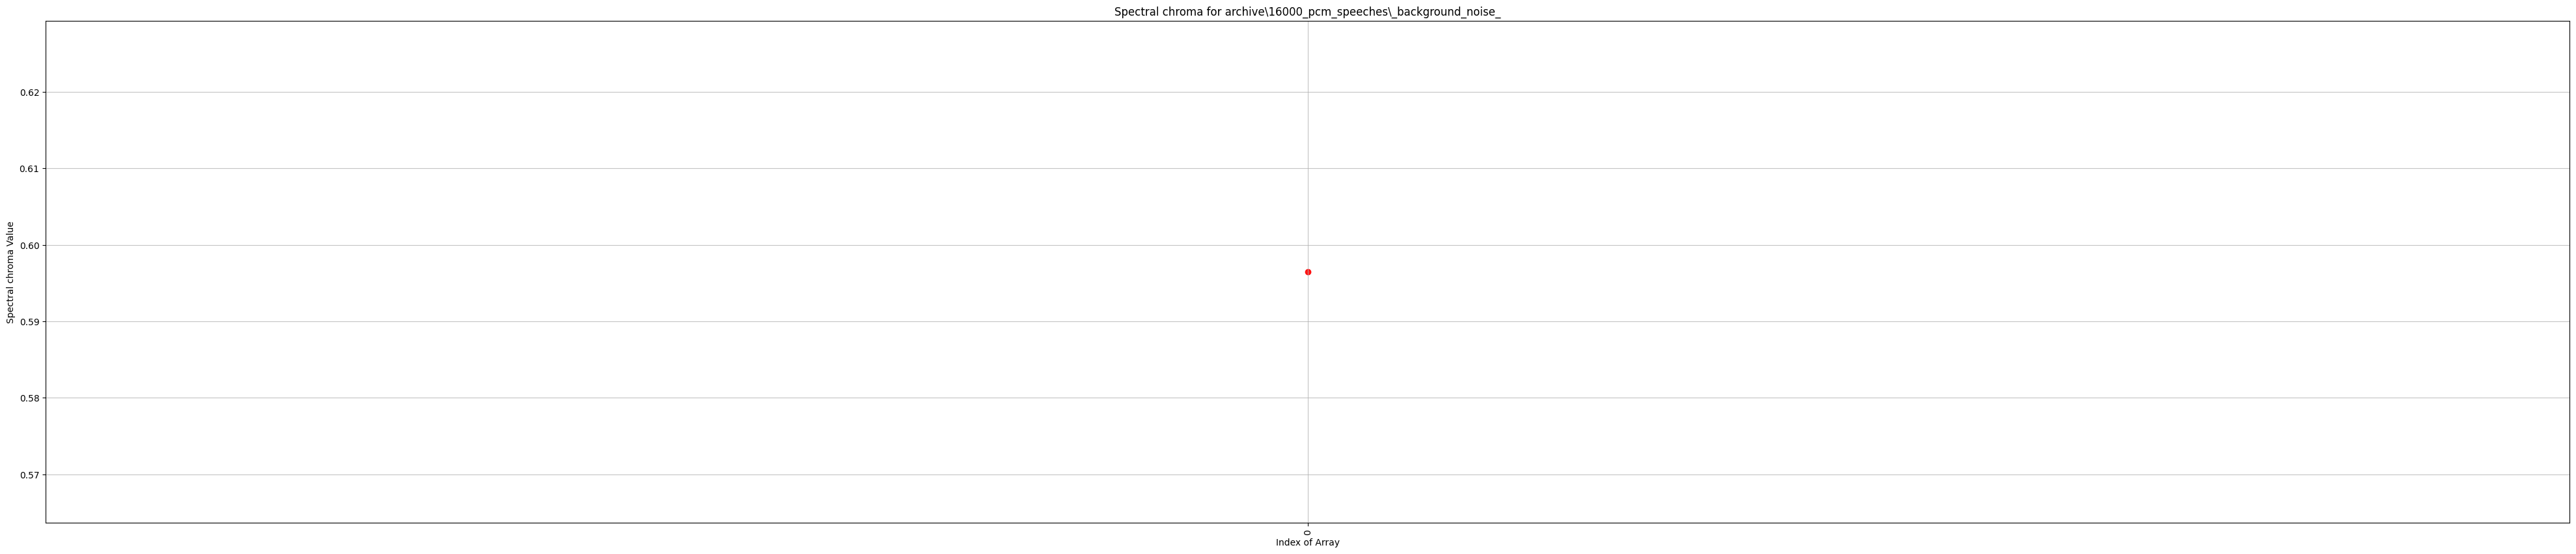

In [ ]:
def plot_chroma_for_folder(folder_path):
    for root, dirs, files in os.walk(folder_path):
        chroma_values = []
        file_indices = []

        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                data, sr = librosa.load(file_path, sr=None)

                chroma = librosa.feature.chroma_stft(y=data, sr=sr)
                mean_chroma = chroma.mean()
                match = re.match(r'(\d+)', file)
                if match:
                    file_index = int(match.group(1))
                    file_indices.append(file_index)
                    chroma_values.append(mean_chroma)
        chroma_values = chroma_values[:700] 
        if chroma_values:
            plt.figure(figsize=(50, 10))
            plt.scatter(range(len(chroma_values)), chroma_values, color='r', alpha=0.9)  # Using scatter plot
            plt.title(f'Spectral chroma for {root}')
            plt.xlabel('Index of Array')
            plt.ylabel('Spectral chroma Value')
            plt.xticks(range(len(chroma_values)), range(len(chroma_values)), rotation=90)
            plt.grid(axis='both', alpha=0.75) 
            plt.show()

for entry in os.scandir(audio_files_dir):
    if entry.is_dir():
        plot_chroma_for_folder(entry.path)


In [ ]:
from scipy.stats import pearsonr


In [ ]:
# def extract_feature(data, sr):
#     mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)
#     return np.mean(mfccs, axis=1)  # Return the mean of MFCCs

# def calculate_correlation(feature_1, feature_2):
#     correlation_coefficient, _ = pearsonr(feature_1, feature_2)
#     return correlation_coefficient

# def get_features_from_folder(folder_path):
#     features = []
#     for root, dirs, files in os.walk(folder_path):
#         for file in files:
#             if file.endswith(".wav"):
#                 file_path = os.path.join(root, file)
#                 data, sr = librosa.load(file_path, sr=None)
#                 if len(data) == 0:
#                     continue 
#                 feature = extract_feature(data, sr)
#                 features.append(feature)
#     return features

# folders = []
# features_list = []

# for entry in os.scandir(audio_files_dir):
#     if entry.is_dir():
#         folders.append(entry.path)
#         features_list.append(get_features_from_folder(entry.path))

# correlation_matrix = np.zeros((len(folders), len(folders)))
# for i in range(len(folders)):
#     for j in range(len(folders)):
#         correlation_matrix[i, j] = calculate_correlation(features_list[i], np.transpose(features_list[j]))

# plt.figure(figsize=(10, 8))
# plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
# plt.title('Correlation Matrix between Different Folders')
# plt.colorbar()
# plt.show()


ValueError: x and y must have the same length.